# Project: Investigate a dataset of Medical Appointment No Shows

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

- For this project, I will be analyzing the "Medical Appointment No Shows" dataset provided by Kaggle.
- This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
- **`PatientId`**: Indicates the patient ID; duplication is possible due to the same patient booking more than one appointment.  
- **`AppointmentID`**: This field should be unique.
- **`Gender`**: Indicates the patient's gender (M/F)     
- **`ScheduledDay`**: Indicates the Date/Time the patient set up their appointment.
- **`AppointmentDay`**:  Indicates the date/time the patient called to book their appointment.
- **`Age`**: Indicates the patient's age.
- **`Neighborhood`**: Indicates the locality of the hospital.
- **`Scholarship`**: Indicates enrollment in Brazilian welfare program - Bolsa Família.
- **`Hipertension`**: Indicates whether or not the patient has Hypertension.
- **`Diabetes`**: Indicates whether or not the patient has Diabetes.
- **`Alcoholism`**: Indicates whether or not the patient is an Alcoholic.
- **`Handcap`**: Indicates whether or not the patient has any disability.
- **`SMS_received`**: Indicates whether or not the patient has received a reminder text message.
- **`Show-up`**: ‘No’ if patient showed up to their appointment, and ‘Yes’ if they did not show up.


In [1]:
# Use this cell to set up import statements for all of the packages that you plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted inline with the notebook.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data 
# types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape

(110527, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The dataset includes 14 columns and 110527 data rows.

- Next, we will identify the data types (Quantitative vs. Categorical) of each column to help us plan and determine the best analysis method for this dataset. 
- First, we will plot the dataframe data using `pariplot()` to gain a preliminary understanding for the data types.
- Next, we will identify the data type of each column individually using `unique()` function to confirm the data type and decide on the type of analysis to conduct.

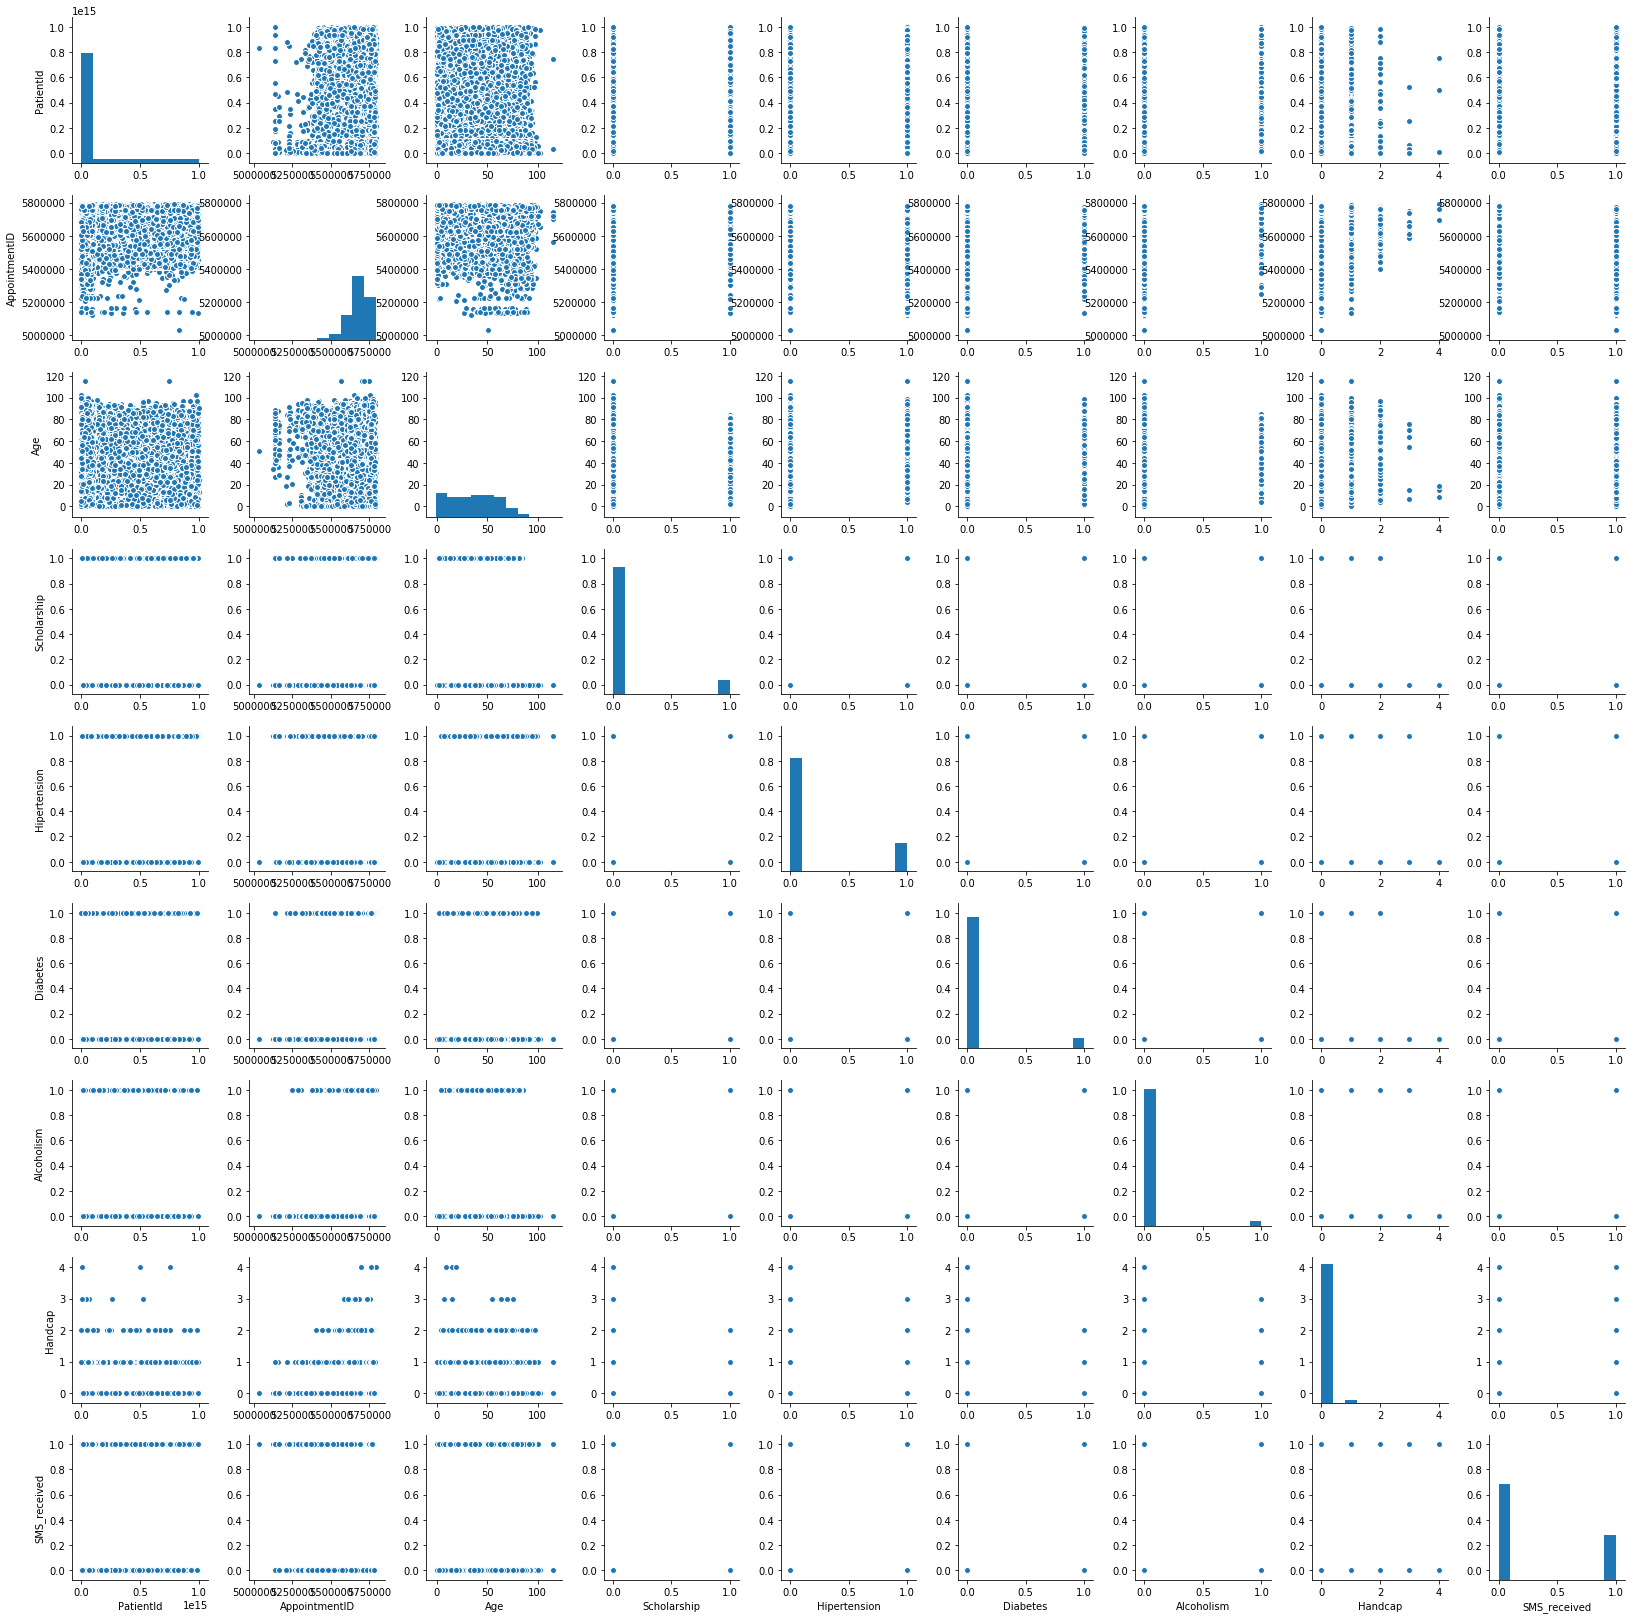

In [5]:
sns.pairplot(df)

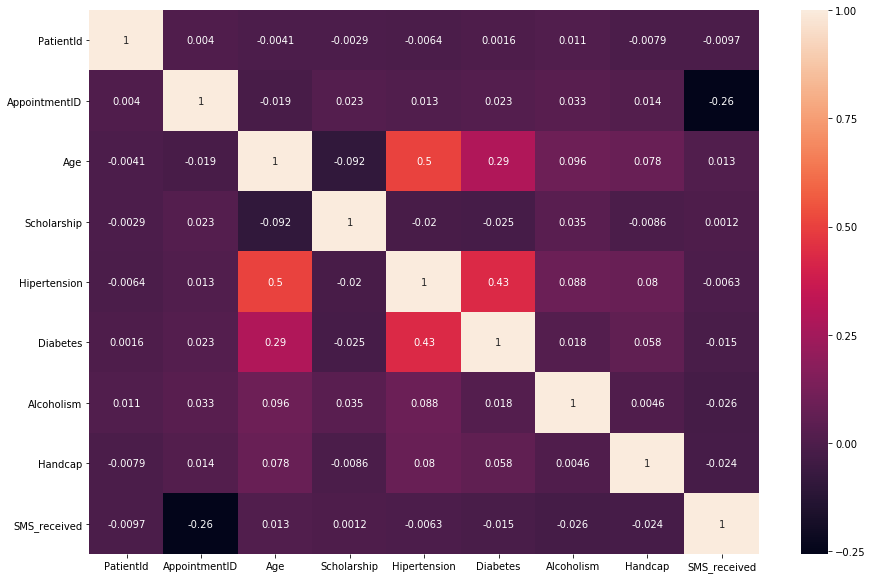

In [6]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), ax=ax, annot=True);

- Looking at the heatmap above, it seems like there is some correlation between Age and Hypertension, and between Hypertension and Diabetes.

Looking at the charts above, we notice the data frame includes the two types of data:

1. **Categorical Data:** Gender, Diabetes, Alcoholism, Handcap, SMS_received, No-show
2. **Quantitative Data:** PatientId, AppointmentID, Age, ScheduledDay, AppointmentDay

In [7]:
# Check if there is any missing values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

- There are no missing values in the data.

In [8]:
# Check for duplicate rows 
df.duplicated().sum()

0

- No duplicate rows.

In [9]:
# Check for duplicate AppointmentID
sum(df.AppointmentID.duplicated())

0

- No duplicates in the AppointmentID column

In [10]:
# Check for duplicate PatientId
sum(df.PatientId.duplicated())

48228

In [11]:
df.PatientId.value_counts().head()

8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
2.584244e+11    62
Name: PatientId, dtype: int64

- The PatientId column contains duplicate values, meaning same patients booked more than an appointment.
- The output of the `value_counts()` function gives the top 5 patients that booked the most number of appointments. 

- Our analysis will mainly focus on the appointment count, rather than patient count.

#### Data Validation

In [12]:
# Check for zero/negative AppointmentID

df[df.AppointmentID < 0]['AppointmentID']

Series([], Name: AppointmentID, dtype: int64)

In [13]:
# Check for zero/negative PatientsId values

df[df.PatientId <= 0]['PatientId']

Series([], Name: PatientId, dtype: float64)

In [14]:
# Check the values in the Gender column

df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [15]:
df['ScheduledDay'].unique()

array(['2016-04-29T18:38:08Z', '2016-04-29T16:08:27Z',
       '2016-04-29T16:19:04Z', ..., '2016-04-27T16:03:52Z',
       '2016-04-27T15:09:23Z', '2016-04-27T13:30:56Z'], dtype=object)

In [16]:
df['AppointmentDay'].unique()

array(['2016-04-29T00:00:00Z', '2016-05-03T00:00:00Z',
       '2016-05-10T00:00:00Z', '2016-05-17T00:00:00Z',
       '2016-05-24T00:00:00Z', '2016-05-31T00:00:00Z',
       '2016-05-02T00:00:00Z', '2016-05-30T00:00:00Z',
       '2016-05-16T00:00:00Z', '2016-05-04T00:00:00Z',
       '2016-05-19T00:00:00Z', '2016-05-12T00:00:00Z',
       '2016-05-06T00:00:00Z', '2016-05-20T00:00:00Z',
       '2016-05-05T00:00:00Z', '2016-05-13T00:00:00Z',
       '2016-05-09T00:00:00Z', '2016-05-25T00:00:00Z',
       '2016-05-11T00:00:00Z', '2016-05-18T00:00:00Z',
       '2016-05-14T00:00:00Z', '2016-06-02T00:00:00Z',
       '2016-06-03T00:00:00Z', '2016-06-06T00:00:00Z',
       '2016-06-07T00:00:00Z', '2016-06-01T00:00:00Z',
       '2016-06-08T00:00:00Z'], dtype=object)

- The time portion is set to zero, therefore, the time aspect of the appointment will be excluded.

In [17]:
# check the values in the Age column
df['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

- Looking at the `Age` values, we notice that there is one record with negative value (-1), we are going to exclude this record from our analysis. 

In [18]:
# Check if the Age column has negative values; 
# we will accept patients with 0 age assuming they represent newborns.

df[df.Age < 0]['Age']

99832   -1
Name: Age, dtype: int64

In [19]:
df['Neighbourhood'].unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

In [20]:
df['Neighbourhood'].nunique()

81

In [21]:
df['Scholarship'].unique()

array([0, 1])

In [22]:
df['Hipertension'].unique()

array([1, 0])

In [23]:
df['Diabetes'].unique()

array([0, 1])

In [24]:
df['Alcoholism'].unique()

array([0, 1])

In [25]:
df['Handcap'].unique()

array([0, 1, 2, 3, 4])

In [26]:
df['SMS_received'].unique()

array([0, 1])

In [27]:
df['No-show'].unique()

array(['No', 'Yes'], dtype=object)

## **Summary:** 
We explored each column individually for data validity and data integrity. We also identified the data types and determined how we are going to use each column in our analysis.

- **`PatientId`**: (Quantitative - Discrete): A number of patients have more than one appointment.
- **`AppointmentID`**: (Quantitative - Discrete)(unique values): Will be the outcome factor in our dataset;
- **`Gender`**: (Categorical - Nominal)     
- **`ScheduledDay`**: (Quantitative - Continuous): Use only the date section to calculate the wait duration between the appointment booking date and the appointment date.
- **`AppointmentDay`**:  (Quantitative - Continuous): Use only the date section to calculate the wait duration between the appointment booking date and the appointment date.
- **`Age`**: (Quantitative - Continuous): Use this column to create age groups.
- **`Neighborhood`**: (Categorical - Nominal): Limit analyasis to top 20 neighborhoods that have the highest numbers of appointments.
- **`Scholarship`**: (Categorical - Nominal)
- **`Hipertension`**: (Categorical - Nominal)
- **`Diabetes`**: (Categorical - Nominal)
- **`Alcoholism`**: (Categorical - Nominal)
- **`Handcap`**: (Categorical - Ordinal)
- **`SMS_received`**: (Categorical - Nominal)
- **`Show-up`**: (Categorical - Nominal)

> In order to present our data in an informative way, we will create data ranges for Age & Waiting duration. 
Select data groups with the highest frequencies within Neighbourhoods and define functions to help organize, summarize, and plot data.

### Data Preparation

In [28]:
# Rename Columns
df.columns = ['PatientID', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'Status']

In [29]:
# Convert PatientID to integer 
df['PatientID'] = (df['PatientID']).astype('int64')

In [30]:
# Convert AppointmentDay and ScheduledDay from String to DateTime format 
# Create 2 columns for: appointment booking date and appointment date. 
# Since the Appointment times were set to 00:00:00 in all the appointments, we exclude it

# Appointment Date
df['AppointmentDate'] = pd.to_datetime(df['AppointmentDay']).dt.date
df['DayofWeek'] = pd.to_datetime(df['AppointmentDay']).dt.weekday_name
df.drop('AppointmentDay',axis=1, inplace = True)
# Appointment Booking Date
df['ScheduledDate'] = pd.to_datetime(df['ScheduledDay']).dt.date
df.drop('ScheduledDay',axis=1, inplace = True)

In [31]:
# Create a new column to show the Waiting Duration (in days) between the scheduling date and appointment date 
df['WaitingDuration'] = df.AppointmentDate - df.ScheduledDate

In [32]:
# Check for negative values in WaitingDuration
df[df['WaitingDuration'] < '0 days']

,PatientID,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Status,AppointmentDate,DayofWeek,ScheduledDate,WaitingDuration
27033,7839272661752,5679978,M,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,2016-05-09,Monday,2016-05-10,-1 days
55226,7896293967868,5715660,F,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,2016-05-17,Tuesday,2016-05-18,-1 days
64175,24252258389979,5664962,F,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,2016-05-04,Wednesday,2016-05-05,-1 days
71533,998231581612122,5686628,F,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,2016-05-05,Thursday,2016-05-11,-6 days
72362,3787481966821,5655637,M,7,TABUAZEIRO,0,0,0,0,0,0,Yes,2016-05-03,Tuesday,2016-05-04,-1 days


- There are 5 appointments where the appointment was booked after the actual appointment.
- Also, we checked the NoShow column and noticed that none of the patients who booked these appointments showed up.
- We will exclude them from our analysis.

In [33]:
# Exclude the 5 records with the negative waiting duration.
df = df[df['AppointmentDate'] >= df['ScheduledDate']]

In [34]:
# Exclude the record with the negative Age value
df = df[df.Age != -1]
df.shape

(110521, 16)

In [35]:
# Update the values in the status, gender, scholarship, hypertension, diabetes, alcoholism, SMS_received columns
df['Status'] = df.Status.astype('category')
df.Status.cat.rename_categories(['Show','NoShow'], inplace = True)

df['Gender'] = df.Gender.astype('category')
df.Gender.cat.rename_categories(['Female','Male'], inplace = True)

df['Scholarship'] = df.Scholarship.astype('category')
df.Scholarship.cat.rename_categories(['No Scholarship','Scholarship'], inplace = True)

df['Hypertension'] = df.Hypertension.astype('category')
df.Hypertension.cat.rename_categories(['No Hypertension','Hypertension'], inplace = True)

df['Diabetes'] = df.Diabetes.astype('category')
df.Diabetes.cat.rename_categories(['No Diabetes','Diabetes'], inplace = True);

df['Alcoholism'] = df.Alcoholism.astype('category')
df.Alcoholism.cat.rename_categories(['No Alcoholism','Alcoholism'], inplace = True);

df['Handicap'] = df.Handicap.astype('category')
df.Handicap.cat.rename_categories(['No Handicap','Handicap L1','Handicap L2', 'Handicap L3', 'Handicap L4'], inplace = True);

df['SMS_received'] = df.SMS_received.astype('category')
df.SMS_received.cat.rename_categories(['No SMS_received','SMS_received'], inplace = True);

df['DayofWeek'] = df.DayofWeek.astype('category')
df.DayofWeek.cat.reorder_categories(['Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday'], 
                                    ordered = True, inplace = True)

# Convert WaitingDuration column to integer for easier filteration 

df['WaitingDuration'] = (df.AppointmentDate - df.ScheduledDate).astype('timedelta64[D]').astype(int)

In [36]:
# Define a new column to include the Age Groups
AgeGroupLabels = [ "{0} - {1}".format(i, i + 19) for i in range(0, 120, 20)]
df['AgeGroup'] = pd.cut(df.Age, range(0, 121, 20), right=False, labels=AgeGroupLabels)
df['AgeGroup'] = df.AgeGroup.astype('category')
df.AgeGroup.cat.categories

Index(['0 - 19', '20 - 39', '40 - 59', '60 - 79', '80 - 99', '100 - 119'], dtype='object')

- 6 age groups are formed with a range of 20 years each.

In [37]:
# Define a new column to include the Waiting Duration Groups
WtngDurtnGroupLabels = [ "{0} - {1}".format(i, i + 29) for i in range(0, 180, 30)]
df['WaitingDurationGroups'] = pd.cut(df.WaitingDuration, range(0, 181, 30), right=False, labels=WtngDurtnGroupLabels)
df['WaitingDurationGroups'] = df.WaitingDurationGroups.astype('category')
df.WaitingDurationGroups.cat.categories

Index(['0 - 29', '30 - 59', '60 - 89', '90 - 119', '120 - 149', '150 - 179'], dtype='object')

- 6 groups with a range of 30 days each.

In [38]:
# Limit working dataset to appointments with NoShowUp status for use
NoShow_df = df[df['Status'] == 'NoShow']

In [39]:
# Create new dataframe to limit patients based in the top 20 neibhourhoods with the highest numbers of appointments.

## Create a list of the top 20 neibhourhoods with the highest numbers of appointments.
top_20_Nbrhd_list = list(df['Neighbourhood'].value_counts().nlargest(20).index)

## Create a new dataframe based on the list above
df_top_20_Nbrhd = df[df['Neighbourhood'].isin (top_20_Nbrhd_list)]

## Filter the Status column to include the NoShow records only
df_top_20_Nbrhd_NoShow = df_top_20_Nbrhd[df_top_20_Nbrhd['Status']=='NoShow']

<a id='eda'></a>
## Exploratory Data Analysis

### Research questions.

1. What is the overall appointment show-up vs no show-up rate?
2. What are the proportions of the different categories within each variable and the show-up rates broken down by category?
3. For each pair of variables, calculate the proportions of category combinations to identify the largest group of patients who didn't show-up. 
> The purpose of this analysis is to serve as a starting point to identify the factors that may be contributing to patients missing their appointments. 

> We will define custom functions to help us conduct our analysis.

In [40]:
# Function to generate a bar plot from the frequency table generated by the Show_NoShow_by_Group function.

def Show_No_Show_bar_plot(df, bygroup):
    df_by_Group = pd.crosstab(df[bygroup], df.Status, normalize = 'index')
    df_by_Group = np.round((df_by_Group * 100), decimals=2)
    ax = df_by_Group.plot.bar(figsize=(10,5));
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals]);
    ax.set_xticklabels(df_by_Group.index,rotation = 0, fontsize = 15);
    ax.set_title('\nShowUp vs. No ShowUp (%) (by ' + df_by_Group.index.name + ')\n', fontsize = 15)
    ax.set_xlabel(df_by_Group.index.name, fontsize = 12)
    ax.set_ylabel('(%)', fontsize = 12)
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.0,1.0), fontsize= 12)
    rects = ax.patches

    # Add Data Labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, 
                height + 2, 
                str(height)+'%', 
                ha='center', 
                va='bottom',
                fontsize = 12)
    return df_by_Group

In [41]:
# A different version of Show_No_Show_bar_plot with stacked bars.

def Show_No_Show_bar_plot_V2(df, bygroup):
    df_by_Group = pd.crosstab(df[bygroup], df.Status, normalize = 'index')
    df_by_Group = np.round((df_by_Group * 100), decimals=2)
    ax = df_by_Group.plot.bar(stacked = True, figsize=(20,10));
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals]);
    ax.set_xticklabels(df_by_Group.index,rotation = 45, fontsize = 12);
    ax.set_title('ShowUp vs. No ShowUp (%) (by ' + df_by_Group.index.name + ')\n', fontsize = 15)
    ax.set_xlabel(df_by_Group.index.name, fontsize = 12)
    ax.set_ylabel('(%)', fontsize = 12)
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.0,1.0), fontsize= 12)
    rects = ax.patches

    # Add Data Labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, 
                height + 2,
                str(height)+'%',
                ha='center',
                va='bottom',
                fontsize = 12)
    return df_by_Group

In [42]:
# Function to calculate the group proportions based on one variable by number of appointments.

def PropByVar(df, variable):
    df_pie = df[variable].value_counts()
    ax = df_pie.plot.pie(figsize=(10,10), autopct='%1.2f%%', fontsize = 12);
    ax.set_title(variable + ' (%) (Per appointment)\n', fontsize = 15);
    return np.round(df_pie/df.shape[0]*100,2)

In [43]:
# Function to calculate the group proportions based on one variable.

def NumOfPatients(df, variable):
    PatID_Count = pd.pivot_table(df, index=variable, values='PatientID',aggfunc = lambda x: len(x.unique()))
    ax = PatID_Count.plot.pie(figsize=(10,10), autopct='%1.2f%%', subplots=True, fontsize = 12, legend = False);
    plt.title(variable + ' (%) (Per patient)\n', fontsize = 15);
    return np.round(PatID_Count/sum(PatID_Count['PatientID'])*100,2)

In [44]:
# Function to plot the noshow-up percentage for two variables.

def NoShowBy2Vars(df,var1, var2):
    Freq_df = pd.crosstab(df[var1], columns = df[var2], normalize = 'index')
    Freq_df = np.round(Freq_df * 100,2)
    ax = Freq_df.plot.barh(stacked = True,figsize=(10,5));
    ax.set_title('\nNo ShowUp (%) (by ' + str(var1) + ' & '+ str(var2) + ')\n', fontsize = 15);
    ax.set_ylabel(Freq_df.index.name, fontsize = 12)
    ax.set_xlabel('(%)', fontsize = 12)
    vals = ax.get_xticks()
    ax.set_xticklabels(['{:3.0f}%'.format(x) for x in vals])
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.0,1.0), fontsize= 12)
    return Freq_df

In [45]:
# Function to calcluate the difference between the Min and Max ShowUp percentage.

def RateVariance (df):
    print(' Max ShowUp (%): ', df['Show'].max(),'%\n', 
          'Min ShowUp (%):', df['Show'].min(), '%\n', 
          'Variance (%):',str(np.round(df['Show'].max() - df['Show'].min(),2)),'%')

### Research Question 1
#### What is the overall appointment show-up vs no show-up rate?

Show      79.81
NoShow    20.19
Name: Status, dtype: float64

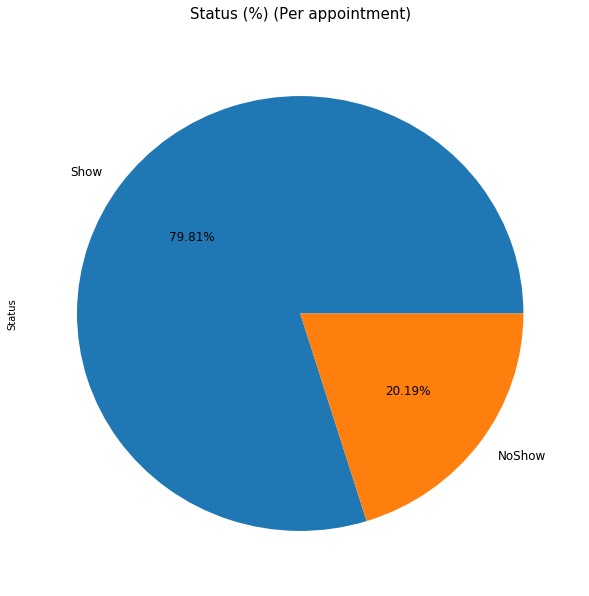

In [46]:
PropByVar(df, 'Status')

- The overall appointment show-up rate is **79.81**%.

### Research Question 2  
#### What are the proportions of the different categories within each variable and the show-up rates broken down by category?

To answer this question, we will perform the following:

1. Calculate weights of each variable (per appointment and per patient) and present the proportions in a pie chart.
2. Calculate Show-up vs. No-Show-up percentages for each category within each variable.
3. Plot the results in a bar chart.
4. Calculate the variance between the highest & lowest Show-up rate.

Female    65.0
Male      35.0
Name: Gender, dtype: float64

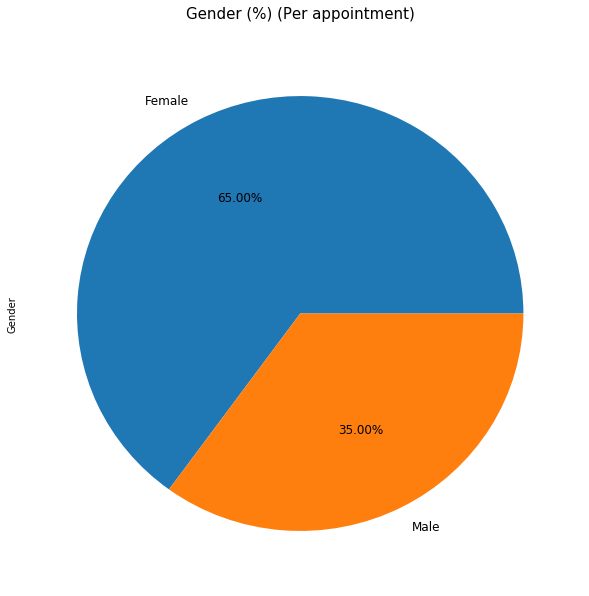

In [47]:
# Gender
PropByVar(df, 'Gender')

- The proportion of appointments where patients are female is 65%, while the proportion of appointments where patients are male is 35%.

,PatientID
Gender,
Female,64.28
Male,35.72


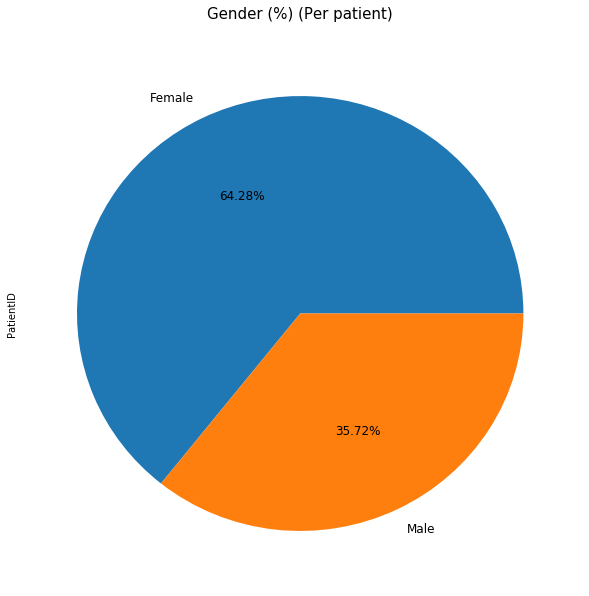

In [48]:
NumOfPatients(df, 'Gender')

- 64.28% of the patients are female and 35.72% are male, which is close to the proportion by appointment.

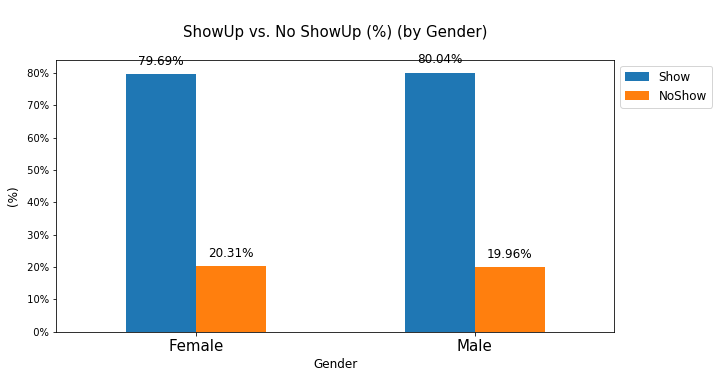

In [49]:
df_Gen = Show_No_Show_bar_plot(df, 'Gender')

In [50]:
RateVariance(df_Gen)

 Max ShowUp (%):  80.04 %
 Min ShowUp (%): 79.69 %
 Variance (%): 0.35 %


#### Observations

1. The number of appointments where patients are female is greater than the number of appointments where patients are male.
2. The number of female patients is greater than the number of male patients.
3. The Show-up rate of male patients (per no. of appointments) is slightly greater than the Show-up rate of female patients.

0 - 19       27.51
40 - 59      27.21
20 - 39      26.12
60 - 79      16.11
80 - 99       3.03
100 - 119     0.01
Name: AgeGroup, dtype: float64

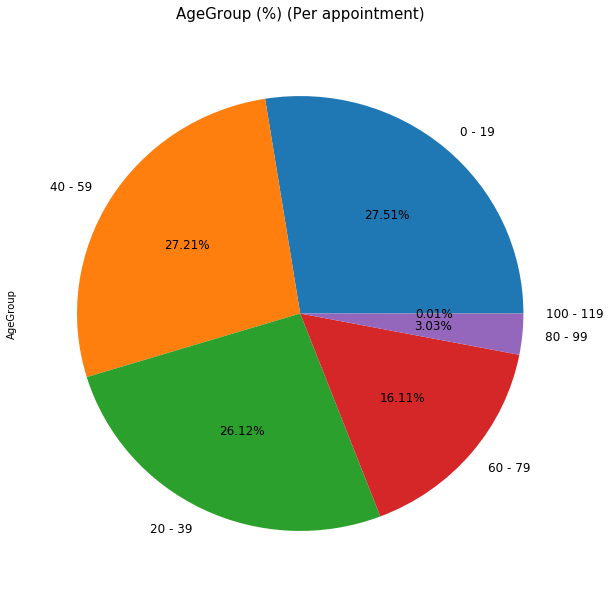

In [51]:
# Age Groups
PropByVar(df, 'AgeGroup')

- The proportion of appointments where patients are from the age group (0-19) is the largest with 27.51%
- The proportion of appointments where patients are from the age group (100 - 119) is the smallest with 0.01%.

,PatientID
AgeGroup,
0 - 19,28.89
20 - 39,25.30
40 - 59,26.25
60 - 79,16.40
80 - 99,3.16
100 - 119,0.01


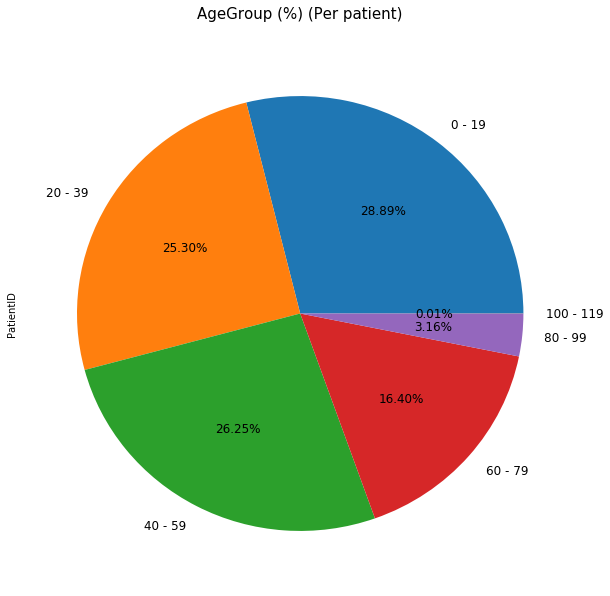

In [52]:
NumOfPatients(df, 'AgeGroup')

- 28.89% of the patients are from the age group (0-19), while only 0.01% of the patients are from the age group (100-119). These proportions are very close to the proportions by appointments.

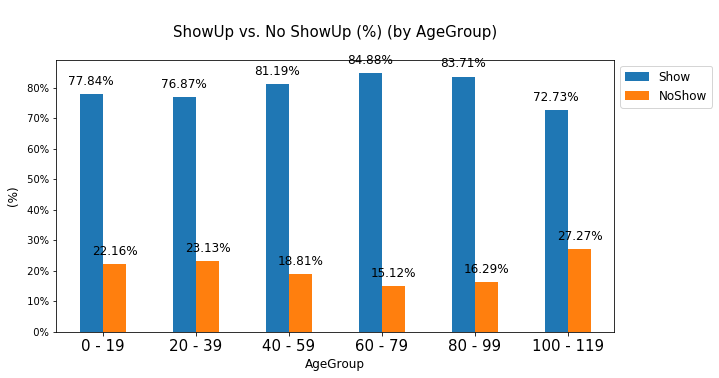

In [53]:
df_AgeGroup = Show_No_Show_bar_plot(df, 'AgeGroup')

In [54]:
RateVariance(df_AgeGroup)

 Max ShowUp (%):  84.88 %
 Min ShowUp (%): 72.73 %
 Variance (%): 12.15 %


#### Observations
1. The proportion of appointments where patients are from the age group (0-19) is largest, while the age group (100-119) is the smallest with 0.01%
2. Same applies to the number of patients. 
3. The Show-up rate of age group (60-79) (per no. of appointments) is the highest with 84.88%, while the Show-up rate of age group (100-119) is the lowest with 72.73%.

JARDIM CAMBURI       11.94
MARIA ORTIZ           8.98
RESISTÊNCIA           6.85
JARDIM DA PENHA       6.00
ITARARÉ               5.44
CENTRO                5.16
SANTA MARTHA          4.84
TABUAZEIRO            4.84
JESUS DE NAZARETH     4.41
BONFIM                4.29
SANTO ANTÔNIO         4.25
SANTO ANDRÉ           3.98
CARATOÍRA             3.97
JABOUR                3.88
SÃO PEDRO             3.79
ILHA DO PRÍNCIPE      3.51
NOVA PALESTINA        3.50
ANDORINHAS            3.50
DA PENHA              3.43
ROMÃO                 3.43
Name: Neighbourhood, dtype: float64

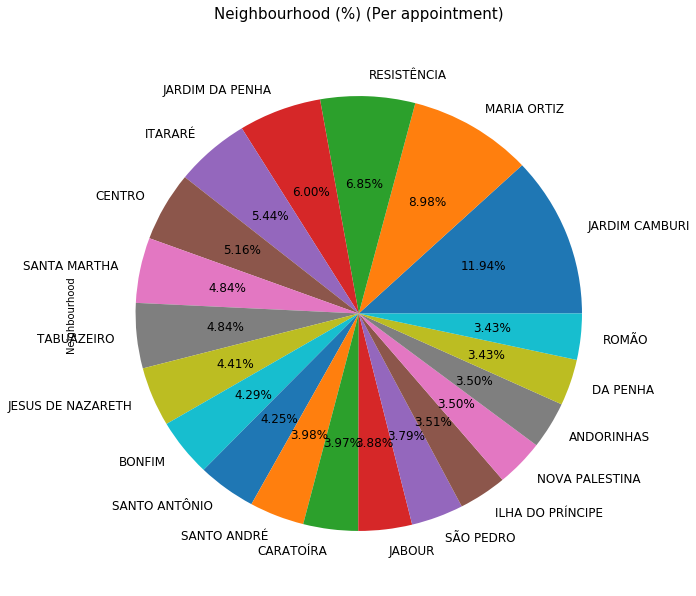

In [55]:
# Neighbourhood
PropByVar(df_top_20_Nbrhd, 'Neighbourhood')

- The proportion of appointments where patients are based in JARDIM CAMBURI is the largest with 11.94%.
- The proportion of appointments where patients are based in DA PENHA and ROMÃO is the smallest with 3.43%

,PatientID
Neighbourhood,
ANDORINHAS,3.12
BONFIM,4.45
CARATOÍRA,4.03
CENTRO,5.15
DA PENHA,3.62
ILHA DO PRÍNCIPE,3.03
ITARARÉ,5.89
JABOUR,3.95
JARDIM CAMBURI,11.56


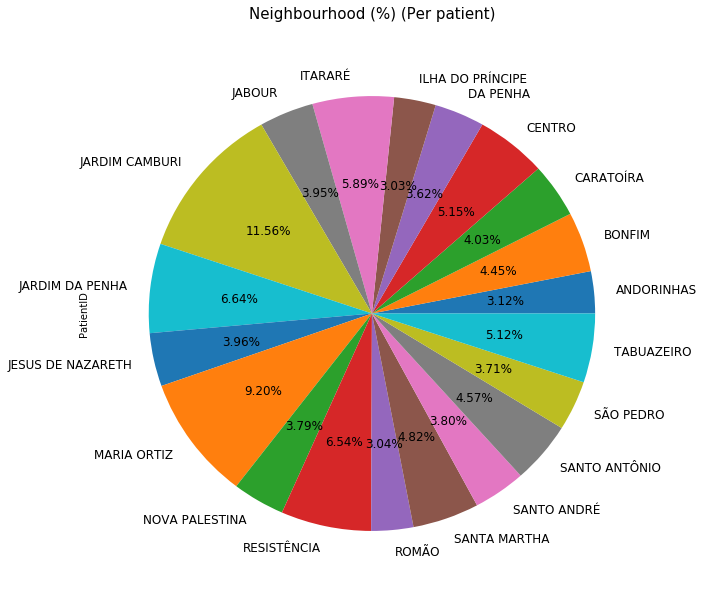

In [56]:
NumOfPatients(df_top_20_Nbrhd, 'Neighbourhood')

- 11.56% of the patients are based in JARDIM CAMBURI, which is close to the proportion of appointments calculated.

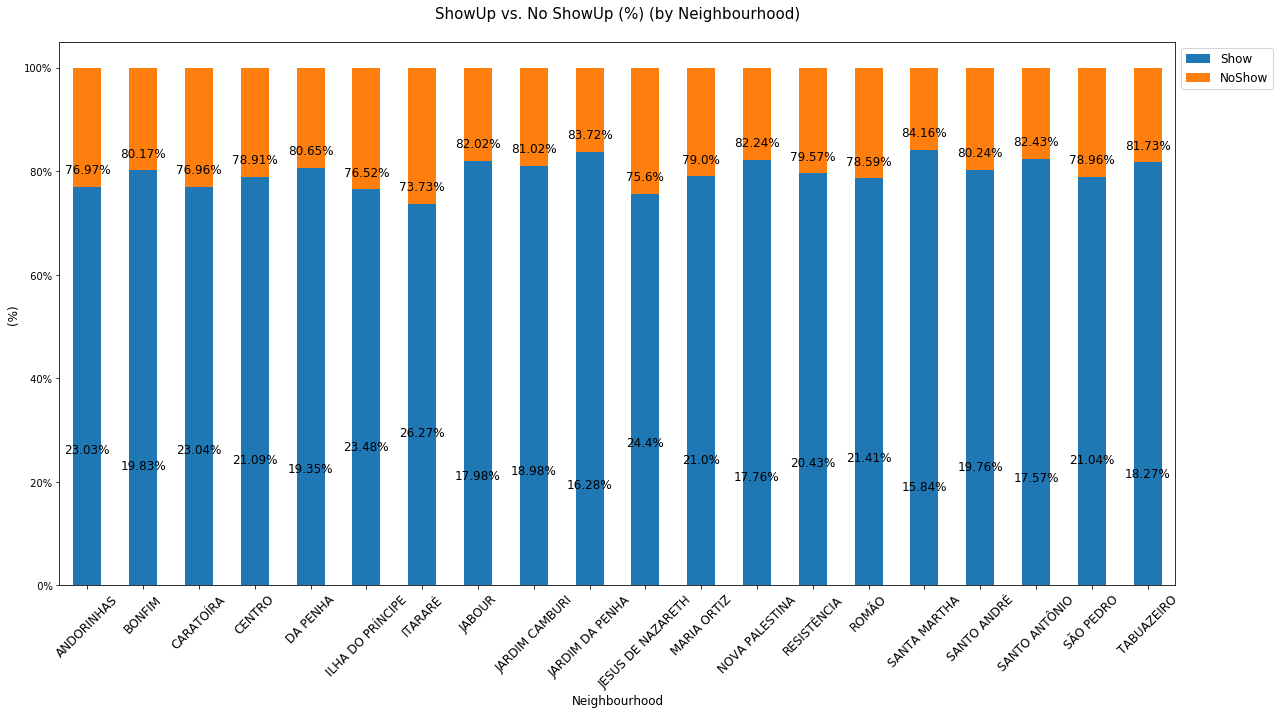

In [57]:
df_Nbrhd = Show_No_Show_bar_plot_V2(df_top_20_Nbrhd,'Neighbourhood')

In [58]:
RateVariance(df_Nbrhd)

 Max ShowUp (%):  84.16 %
 Min ShowUp (%): 73.73 %
 Variance (%): 10.43 %


#### Observations
1. The proportion of appointments where patients are based JARDIM CAMBURI is the largest among other neighbourhoods with 11.94%, while DA PENHA and ROMÃO is the smallest with 0.01%.
2. Same applies to the number of patients. 
3. The Show-up rate of SANTA MARTHA (per no. of appointments) is the highest with 84.16%, while the show-up rate of ITARARÉ is the lowest with 73.73%.

No Scholarship    90.17
Scholarship        9.83
Name: Scholarship, dtype: float64

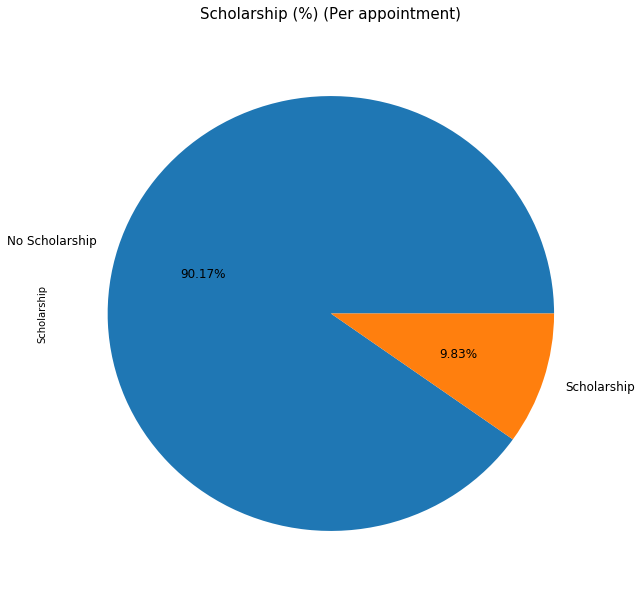

In [59]:
# Scholarship
PropByVar(df, 'Scholarship')

- The proportion of appointments where patients don't have a scholarship is 90.17%, while the proportion of appointments where patients have been granted a scholarship is 9.83%.

,PatientID
Scholarship,
No Scholarship,90.71
Scholarship,9.29


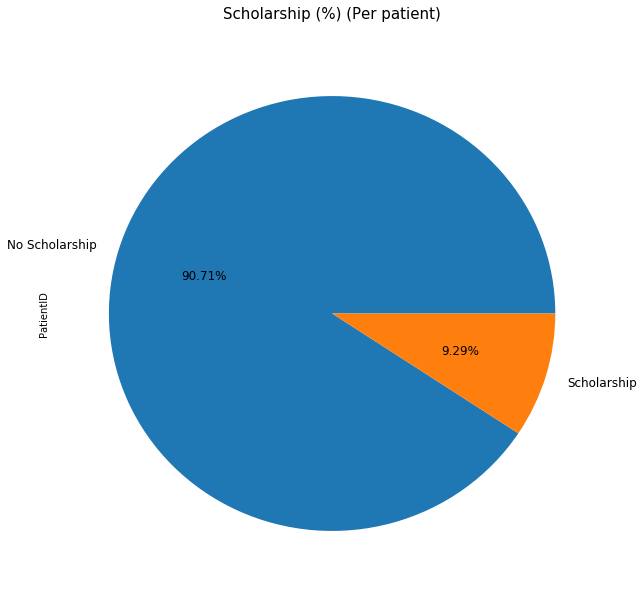

In [60]:
NumOfPatients(df, 'Scholarship')

- 90.71% of the patients don't have a scholarship, while only 9.29% of the patients have been granted a scholarship.

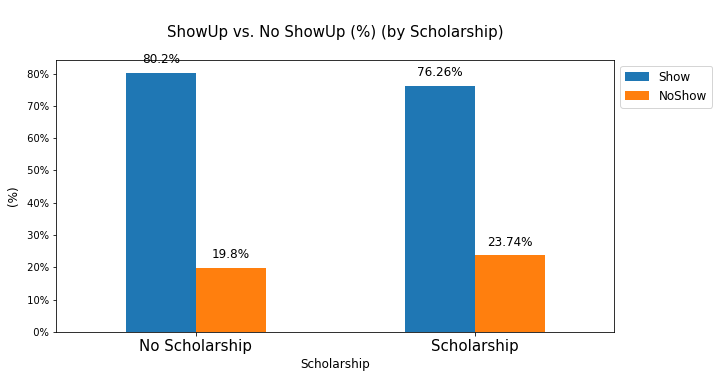

In [61]:
df_Sclrshp = Show_No_Show_bar_plot(df, 'Scholarship')

- The appointments that belong to patients with no scholarship (90.17% of the total population) have the highest show-up rate of 80.2% (higher than the average show-up rate).
- Those with scholarships (9.83% of the total population) have a show-up rate of 76.26% (lower than the average show-up rate).

In [62]:
RateVariance(df_Sclrshp)

 Max ShowUp (%):  80.2 %
 Min ShowUp (%): 76.26 %
 Variance (%): 3.94 %


#### Observations
1. The proportion of appointments where patients don't have a scholarship is the largest with 90.17%, which is similar to the proportion of patients without a scholarship.
3. The Show-up rate of patients who don't have a scholarship is the highest with 80.2%, while the show-up rate of patients who have a scholarship is 76.26%.

No Hypertension    80.27
Hypertension       19.73
Name: Hypertension, dtype: float64

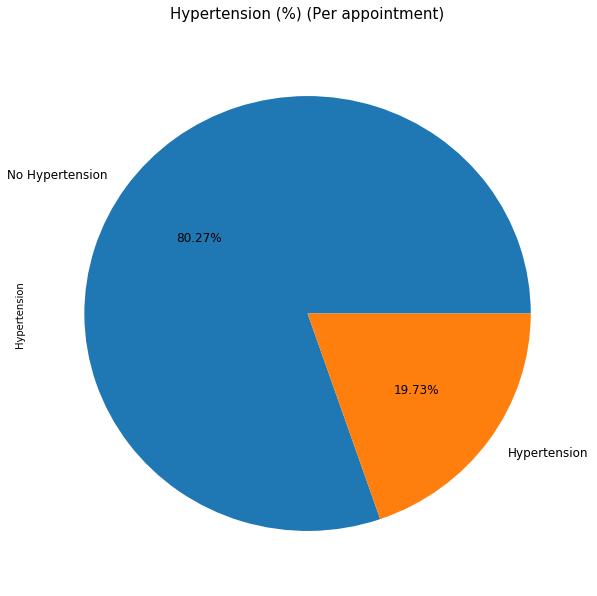

In [63]:
# Hypertension
PropByVar(df, 'Hypertension')

- The proportion of appointments where patients have no hypertension is 80.27%, while the proportion of appointments where patients have hypertension is 19.73%.

,PatientID
Hypertension,
No Hypertension,80.35
Hypertension,19.65


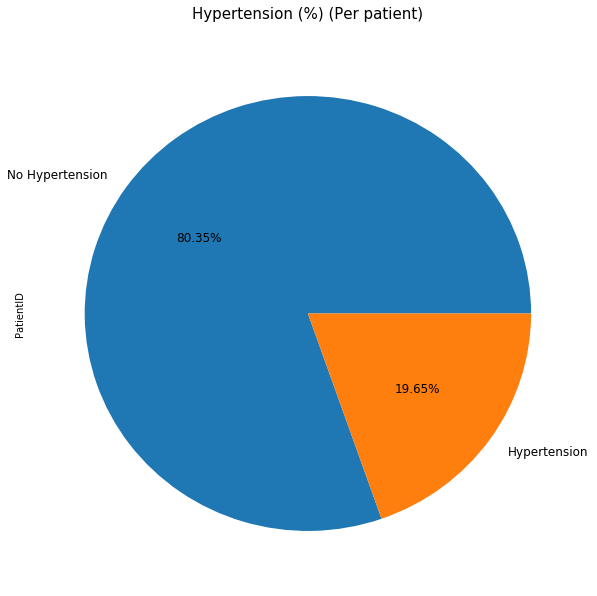

In [64]:
NumOfPatients(df, 'Hypertension')

- 80.35% of the patients don't have hypertension, which is close to the proportion we got when calculating the proportion by appointments.

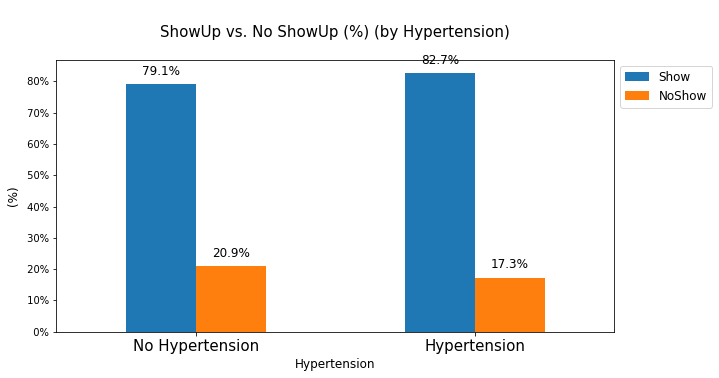

In [65]:
df_Hprtn = Show_No_Show_bar_plot(df, 'Hypertension')

In [66]:
RateVariance(df_Hprtn)

 Max ShowUp (%):  82.7 %
 Min ShowUp (%): 79.1 %
 Variance (%): 3.6 %


#### Observations
1. The proportion of appointments where patients don't have hypertension is the largest with 80.27%.
2. The proportion of patients who don't have hypertension is the largest with 80.35%.
3. The Show-up rate of patients who have hypertension is the highest with 82.7%, while the show-up rate of patients who dont'have hypertension is 79.1%.

No Diabetes    92.81
Diabetes        7.19
Name: Diabetes, dtype: float64

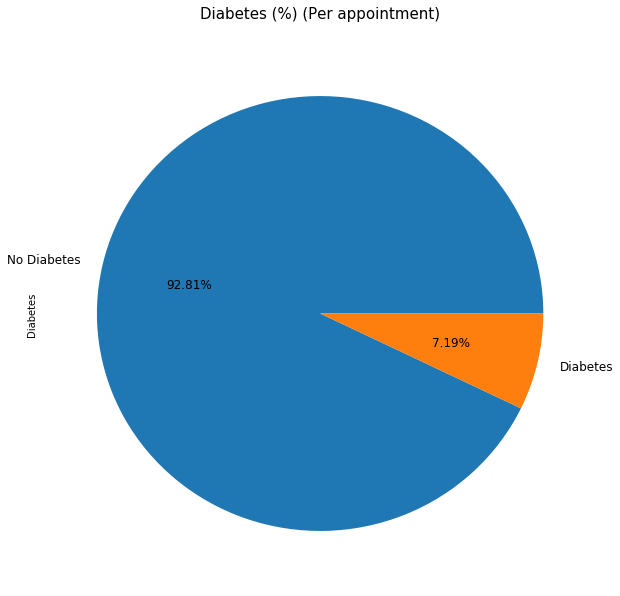

In [67]:
# Diabetes
PropByVar(df, 'Diabetes')

- The proportion of appointments where patients don't have diabetes is 92.81%, while the proportion of appointments where patients have diabetes is 7.19%.

,PatientID
Diabetes,
No Diabetes,92.91
Diabetes,7.09


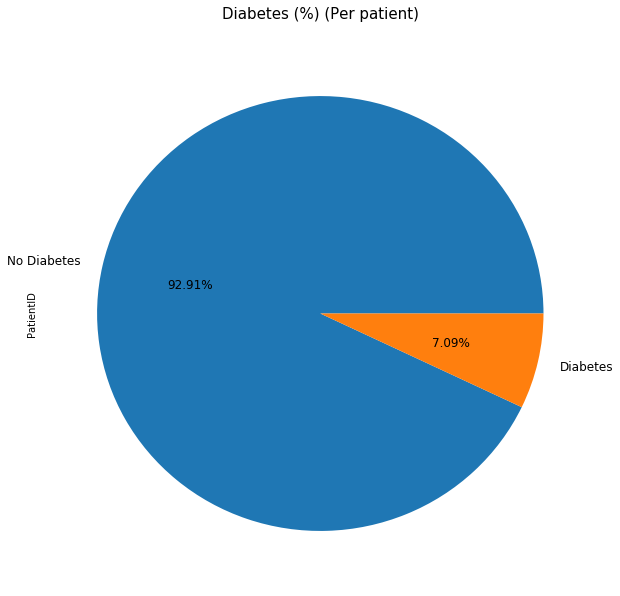

In [68]:
NumOfPatients(df, 'Diabetes')

- 92.91% of the patients don't have diabetes, which is very close to the proportion by appointments.

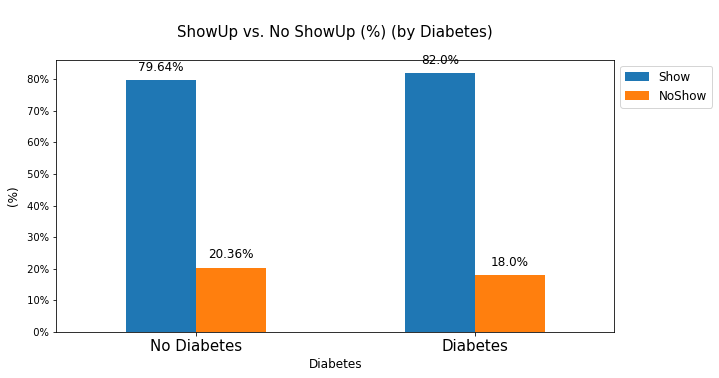

In [69]:
df_Dbt = Show_No_Show_bar_plot(df, 'Diabetes')

In [70]:
RateVariance(df_Dbt)

 Max ShowUp (%):  82.0 %
 Min ShowUp (%): 79.64 %
 Variance (%): 2.36 %


#### Observations
1. The proportion of appointments where patients don't have diabetes is the largest with 92.81%.
2. The proportion of patients who don't have diabetes is the largest with 92.91%.
3. The Show-up rate of patients who have diabetes is the highest with 82%, while the show-up rate of patients who don't have diabetes is 79.64%.

No Alcoholism    96.96
Alcoholism        3.04
Name: Alcoholism, dtype: float64

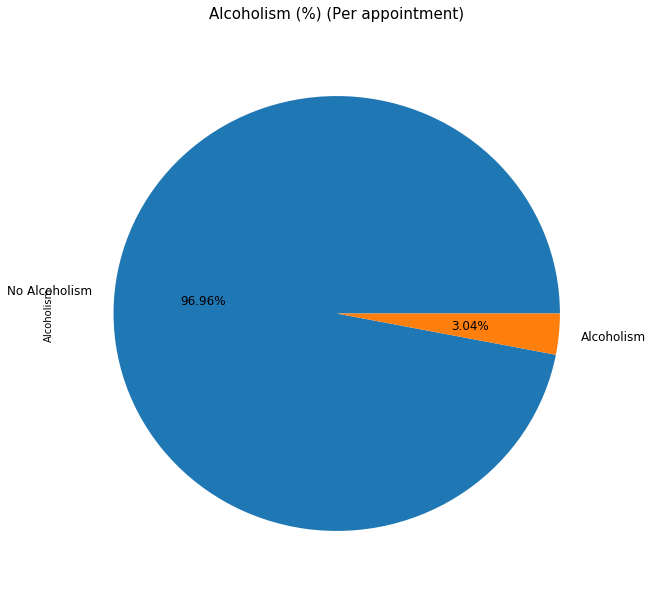

In [71]:
# Alcoholism
PropByVar(df, 'Alcoholism')

- The proportion of appointments where patients are not alcoholic is 96.96%, while the proportion of appointments where patients are alcoholic is 3.04%.

,PatientID
Alcoholism,
No Alcoholism,97.58
Alcoholism,2.42


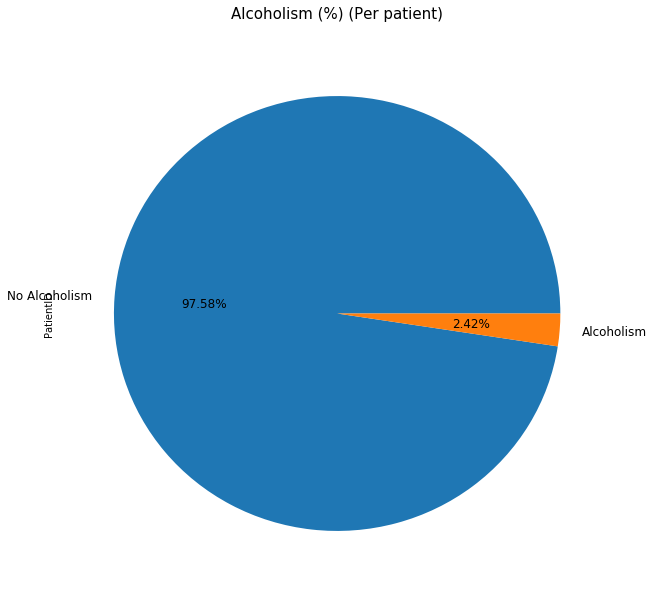

In [72]:
NumOfPatients(df, 'Alcoholism')

- 97.58% of the patients are not alcoholic, which is close to the proportion by appointments.

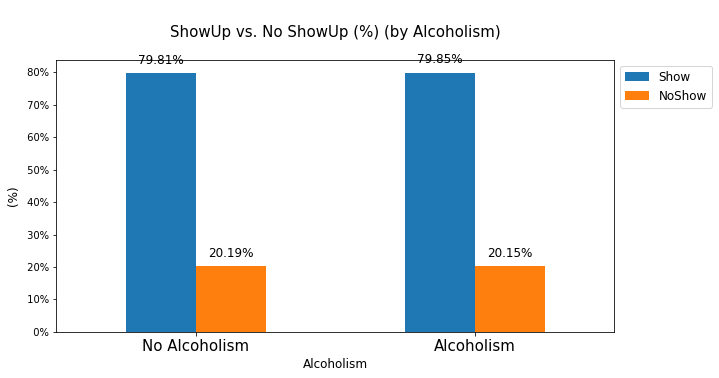

In [74]:
df_Alchl = Show_No_Show_bar_plot(df, 'Alcoholism')

- The patients who are alcoholic (3.04% of the total population) have the highest show-up rate of 79.85% (higher than the average show-up rate).
- The patients who are not alcoholic (96.96 % of the total population) have a show-up rate of 79.81% (equal to the average show-up rate).

In [75]:
RateVariance(df_Alchl)

 Max ShowUp (%):  79.85 %
 Min ShowUp (%): 79.81 %
 Variance (%): 0.04 %


#### Observations
1. The proportion of appointments where patients are not alcoholic is the largest with 96.96%.
2. The proportion of patients who are not alcoholic is the largest with 97.58%.
3. The Show-up rate of patients who are alcoholic is the highest with 79.85%.
4. The show-up rate of patients who are not alcoholic is 79.81%.

No Handicap    97.97
Handicap L1     1.85
Handicap L2     0.17
Handicap L3     0.01
Handicap L4     0.00
Name: Handicap, dtype: float64

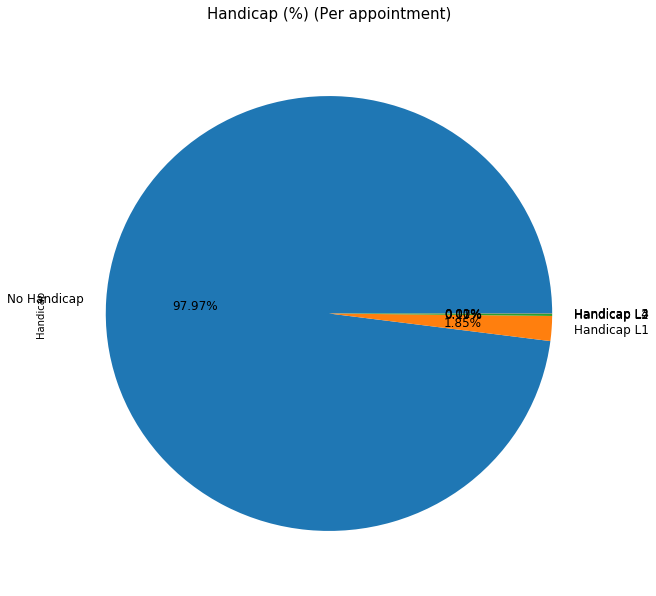

In [76]:
# Handicap
PropByVar(df, 'Handicap')

- The proportion of appointments where patients have no handicap is 97.97%, while the proportion of appointments where patients have Handicap L1 is 1.85%. 

,PatientID
Handicap,
No Handicap,98.18
Handicap L1,1.65
Handicap L2,0.16
Handicap L3,0.01
Handicap L4,0.00


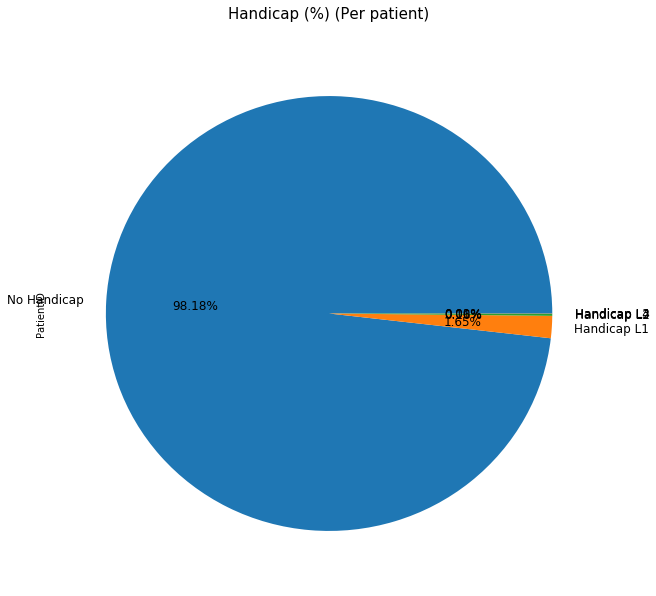

In [77]:
NumOfPatients(df, 'Handicap')

- 98.18% of the patients don't have a handicap, which is close to the proportion by appointments.

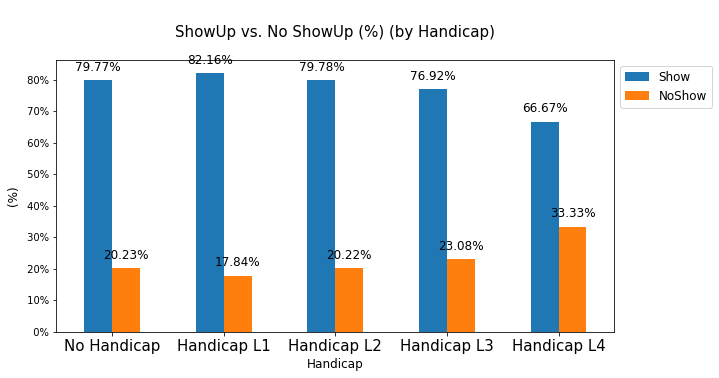

In [78]:
df_Hndcp = Show_No_Show_bar_plot(df, 'Handicap')

- The patients with Handicap Level 1 (1.85% of the total population) have the highest show-up rate of 82.16% (higher than the average show-up rate).
- The patients with Handicap Level 4 (0.0027 % of the total population) have a show-up rate of 66.67% (less than the average show-up rate).

In [79]:
RateVariance(df_Hndcp)

 Max ShowUp (%):  82.16 %
 Min ShowUp (%): 66.67 %
 Variance (%): 15.49 %


#### Observations
1. The proportion of appointments where patients don't have a handicap is the largest with 97.97%.
2. The proportion of patients who don't have a handicap is the largest with 98.18%.
3. The Show-up rate of patients who have a handicap L1 is the highest with 82.16%.
4. The Show-up rate of patients who have a handicap L4 is 66.67%.

No SMS_received    67.9
SMS_received       32.1
Name: SMS_received, dtype: float64

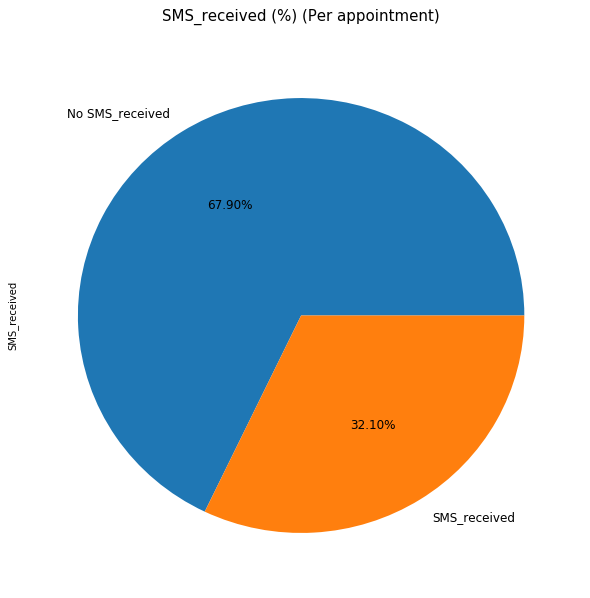

In [80]:
# SMS Received
PropByVar(df, 'SMS_received')

- The proportion of appointments where patients didn't receive an SMS is 67.90%, while the proportion of appointments where patients received an SMS is 32.10%.

,PatientID
SMS_received,
No SMS_received,63.59
SMS_received,36.41


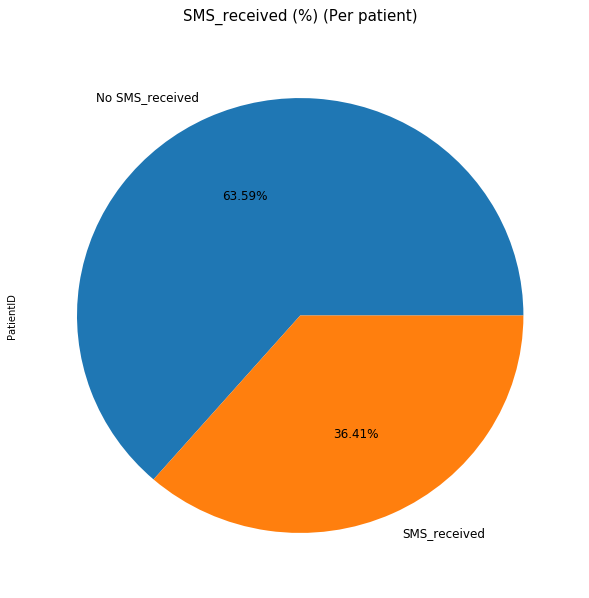

In [81]:
NumOfPatients(df, 'SMS_received')

- 63.59% of the patients didn't receive an SMS reminder, which is slightly different from the proportion (67.90%) by appointments.

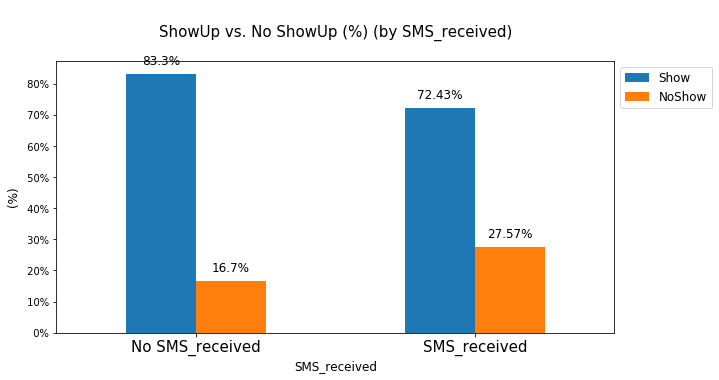

In [82]:
df_SMS = Show_No_Show_bar_plot(df, 'SMS_received')

In [83]:
RateVariance(df_SMS)

 Max ShowUp (%):  83.3 %
 Min ShowUp (%): 72.43 %
 Variance (%): 10.87 %


#### Observations
1. The proportion of appointments where patients didn't receive an SMS reminder is 67.90%.
2. The proportion of patients who didn't receive an SMS reminder is 67.59%.
3. The Show-up rate of patients who didn't receive an SMS reminder is the highest with 83.3%.
4. The Show-up rate of patients who received an SMS reminder is 72.43%.

Wednesday    23.40
Tuesday      23.20
Monday       20.55
Friday       17.21
Thursday     15.60
Saturday      0.04
Name: DayofWeek, dtype: float64

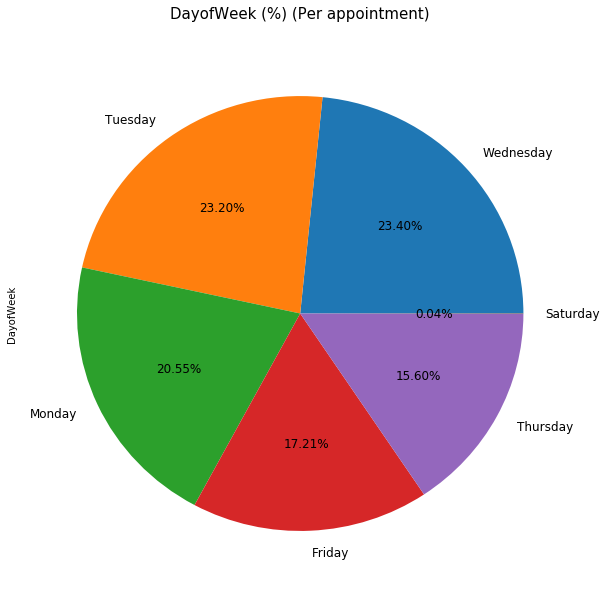

In [84]:
# Day of the week
PropByVar(df, 'DayofWeek')

- The proportion of appointments where patients where scheduled on a Wednesday is 23.40% which is the highest, while the lowest proportion of appointments were shceduled on a Saturday, 0.04%.

,PatientID
DayofWeek,
Monday,20.52
Tuesday,22.99
Wednesday,22.88
Thursday,16.29
Friday,17.28
Saturday,0.04


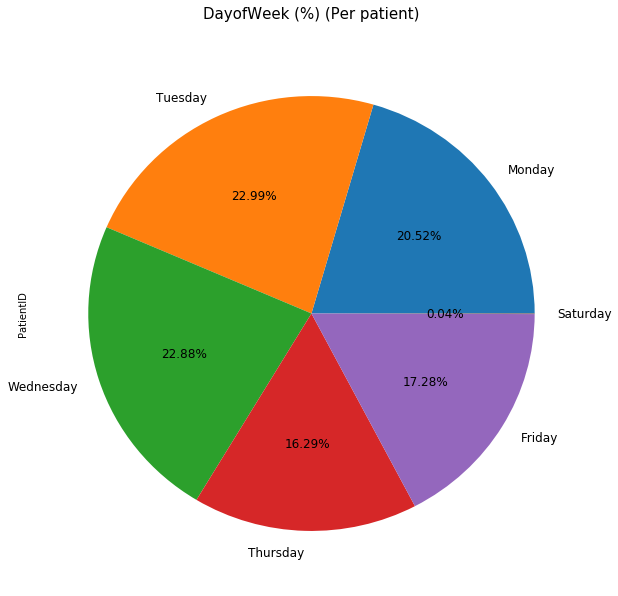

In [85]:
NumOfPatients(df, 'DayofWeek')

- 22.99% of the patients are scheduled to come on a Tuesday, which is slightly close to the proportion by appointments.

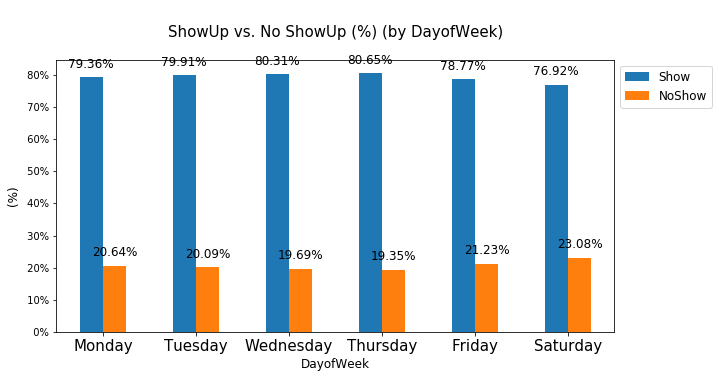

In [86]:
df_DoW = Show_No_Show_bar_plot(df, 'DayofWeek')

- Patients with an appointment on Thursday (15.60% of the total population) have the highest show-up rate of 80.65 (higher than the average show-up rate).
- Patients with an appointment on Saturday (0.04% of the total population) have the lowest show-up rate of 76.92% (less than the average show-up rate).

In [87]:
RateVariance(df_DoW)

 Max ShowUp (%):  80.65 %
 Min ShowUp (%): 76.92 %
 Variance (%): 3.73 %


#### Observations
1. The proportion of appointments where patients were scheduled to come on a Wednesday is the largest with 23.40%.
2. The proportion of patients who were scheduled to come on a Tuesday is the largest with 22.99%.
3. The Show-up rate of patients who were scheduled to come on a Thursday is the highest with 80.65%.
4. The Show-up rate of patients who were scheduled to come on a Saturday is the lowest with 76.92%.

0 - 29       89.97
30 - 59       8.07
60 - 89       1.71
90 - 119      0.17
150 - 179     0.05
120 - 149     0.03
Name: WaitingDurationGroups, dtype: float64

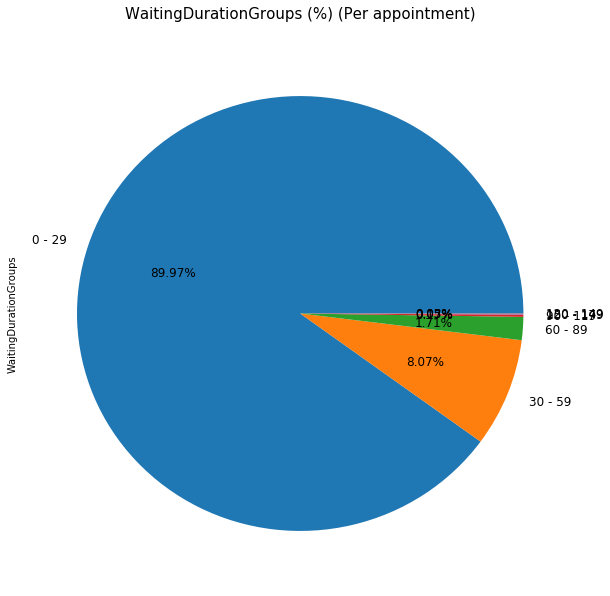

In [88]:
# Waiting Duration
PropByVar(df, 'WaitingDurationGroups')

- The proportion of appointments where patients have a waiting duration (0 - 29) days is 89.97%.
- The proportion of appointments where patients have have a waiting duration (120 - 149) days is 0.03%.

,PatientID
WaitingDurationGroups,
0 - 29,85.10
30 - 59,11.89
60 - 89,2.61
90 - 119,0.28
120 - 149,0.04
150 - 179,0.08


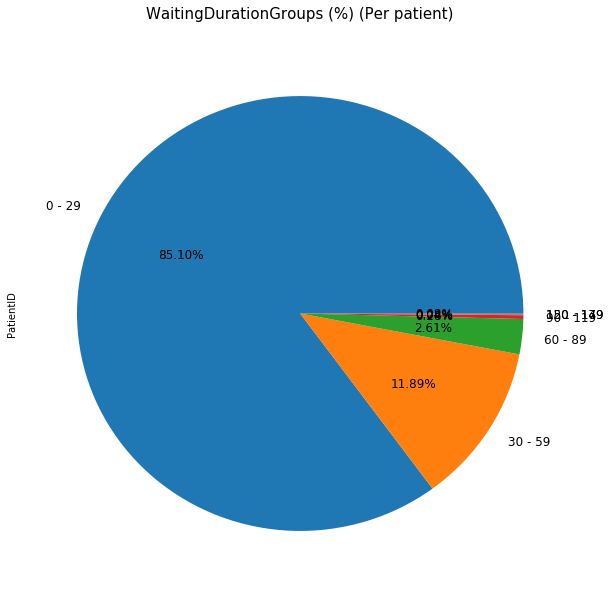

In [89]:
NumOfPatients(df, 'WaitingDurationGroups')

- 85.10% of the patients have a waiting duration (0 - 29) days, which is slightly different from the proportion (89.97%) by appointments.

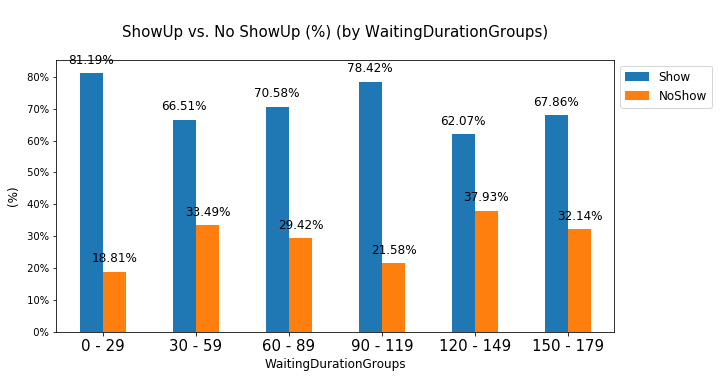

In [90]:
df_WtngDur = Show_No_Show_bar_plot(df, 'WaitingDurationGroups')

- Patients with waiting duration (0 - 29 days) (89.97% of the total population) have the highest show-up rate of 81.19% (higher than the average show-up rate). 
- Patients with waiting duration (120 - 149 days) (0.03% of the total population) have a show-up rate of 62.07% (less than the average show-up rate).

In [91]:
RateVariance(df_WtngDur)

 Max ShowUp (%):  81.19 %
 Min ShowUp (%): 62.07 %
 Variance (%): 19.12 %


#### Observations
1. The proportion of appointments where patients had a waiting duration between 0 - 29 days is the largest with 89.97%.
2. The proportion of patients who had a waiting duration between 0 - 29 days is the largest with 85.10%.
3. The Show-up rate of patients who had a waiting duration between 0 - 29 days is the highest with 81.19%.
4. The Show-up rate of patients who have a waiting duration between 120 - 149 days is the lowest with 62.07%.

### Research Question 4
#### For each pair of variables, calculate the proportions of category combinations to identify the largest group of patients who didn't show-up. (Limit analysis to 3 variables)

To answer this question, we will perform the following:
1. For each selected variable, break down the No Show-up based on the categories of this variable and other variables and plot the results in a stacked bar chart.
2. Identify the category combinations where the NoShowUp% is highest.
3. As the steps above rely on the number of appointments and not number of patients to calculate the percentages, we will calculate the (No. of Patients/No. of Appointments) percentage to help better interpret results and make sure results are not biased and farily presented. 
4. In order to do that, a custom function (`Recurring_Patient_prct`) to calculate this percentage for each variable/group combination is defined.

> A recurring patient is a patient that booked more than one appointment and didn't show up more than once. 
  A new patient is a patient who didn't show up to their appointment only once.

The variables to be analyzed are:

- Gender
- Age (Age Groups)
- SMS Received

In [95]:
new_patient = np.round(NoShow_df['PatientID'].nunique()/NoShow_df['AppointmentID'].nunique()*100,2)
rec_patient = 100-new_patient
print('New patients(%): ' + str(new_patient) + '%\n' + 'Recurring patients(%): ' + str(rec_patient) + '%')

New patients(%): 79.15%
Recurring patients(%): 20.85%


- The percentage of new patients is 79.15% & recurring patients is 20.85%.

In [92]:
def Recurring_Patient_prct(df,var1,var2):
    
    # Pivot table to calcuate the patientID count 
    PatID_Count = pd.pivot_table(df, index=var1, columns=var2, values='PatientID',aggfunc = lambda x: len(x.unique()))
    
    # Pivot table to calcuate the AppointmentID count 
    AptID_Count = pd.pivot_table(df, index=var1, columns=var2, values='AppointmentID',aggfunc='count')
    
    # divide the two tables above to calculate the percentage and return the resulting table.
    Div_chck = np.round((1 - PatID_Count/AptID_Count)*100,2)
    
    ax = Div_chck.plot.bar(figsize=(10,5));
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals]);
    ax.set_xticklabels(Div_chck.index,rotation = 0, fontsize = 15);
    ax.set_title('\nRecurring Patients (%)\n', fontsize = 15)
    ax.set_xlabel(Div_chck.index.name, fontsize = 12)
    ax.set_ylabel('(%)', fontsize = 12)
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.0,1.0), fontsize= 12)
    rects = ax.patches

    # Add Data Labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, 
                height + 2, 
                str(height)+'%', 
                ha='center', 
                va='bottom',
                fontsize = 12)
    
    return Div_chck

##### Gender

Scholarship,No Scholarship,Scholarship
Gender,,
Female,85.57,14.43
Male,93.89,6.11


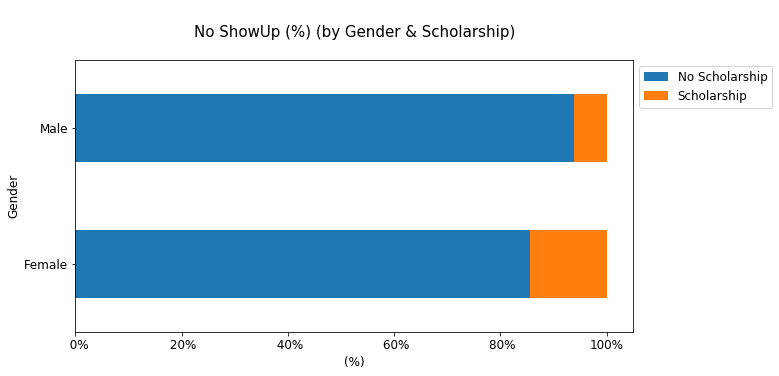

In [93]:
NoShowBy2Vars(NoShow_df,'Gender', 'Scholarship')

Scholarship,No Scholarship,Scholarship
Gender,,
Female,20.48,25.07
Male,19.76,28.60


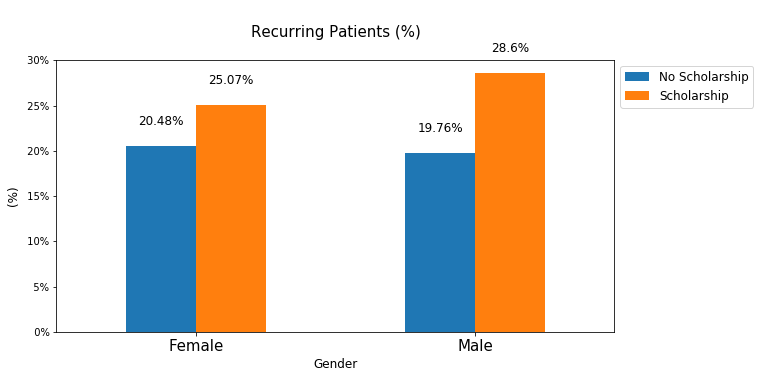

In [94]:
Recurring_Patient_prct(NoShow_df,'Gender','Scholarship')

##### Observations

- 14.43% of the '*NoShowUp*' appointments belong to female patients who have a scholarship;
- 6.11% of the '*NoShowUp*' appointments belong to male patients who have a scholarship;

Looking at the *Recurring patients (%)* chart, we found that:

- The proportion of recurring patients with a scholarship (25.07%) is greater than those with no scholarship (20.48%).

Hypertension,No Hypertension,Hypertension
Gender,,
Female,81.79,18.21
Male,85.56,14.44


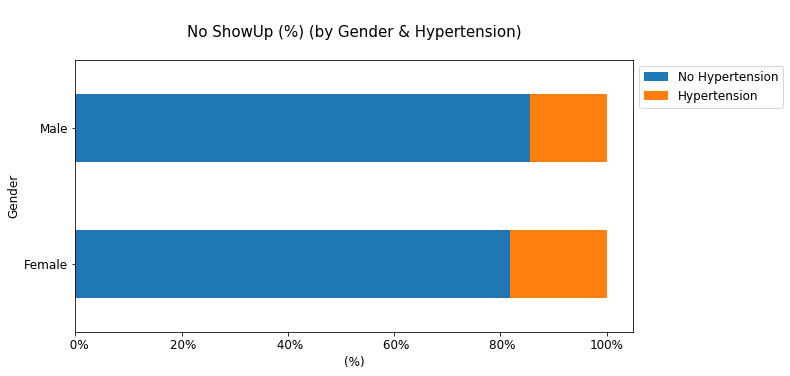

In [96]:
# NoShowUp% by gender and hypertension

NoShowBy2Vars(NoShow_df,'Gender' ,'Hypertension')

Hypertension,No Hypertension,Hypertension
Gender,,
Female,21.31,20.40
Male,20.54,18.92


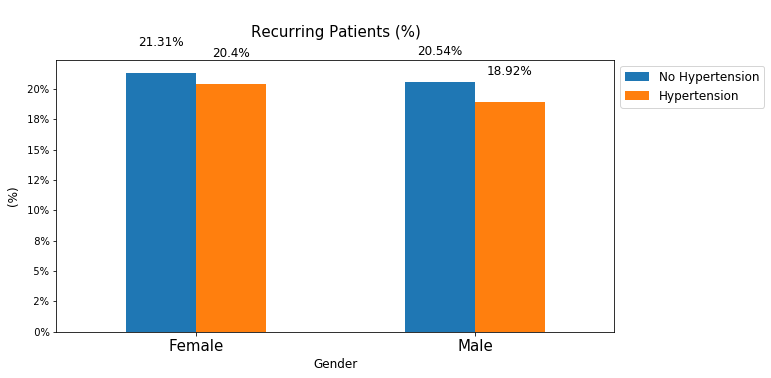

In [97]:
Recurring_Patient_prct(NoShow_df,'Gender','Hypertension')

##### Observations

- 18.21% of the '*NoShowUp*' appointments belong to female patients who experiance hypertension.
- 14.44% of the '*NoShowUp*' appointments belong to male patients who experiance hypertension.

Looking at the *Recurring patients (%)* chart, we found that:

- The proportion of female recurring patients with no hypertension (21.31%) is greater than those with hypertension (20.4%).
- The proportion of male recurring patients with no hypertension (20.54%) is greater than those with hypertension (18.92%).

Diabetes,No Diabetes,Diabetes
Gender,,
Female,93.03,6.97
Male,94.65,5.35


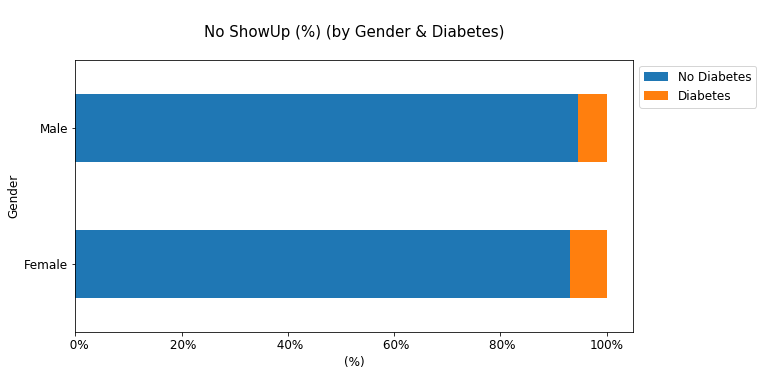

In [98]:
# NoShowUp% by gender and diabetes

NoShowBy2Vars(NoShow_df,'Gender' ,'Diabetes')

Diabetes,No Diabetes,Diabetes
Gender,,
Female,21.10,21.73
Male,20.64,14.29


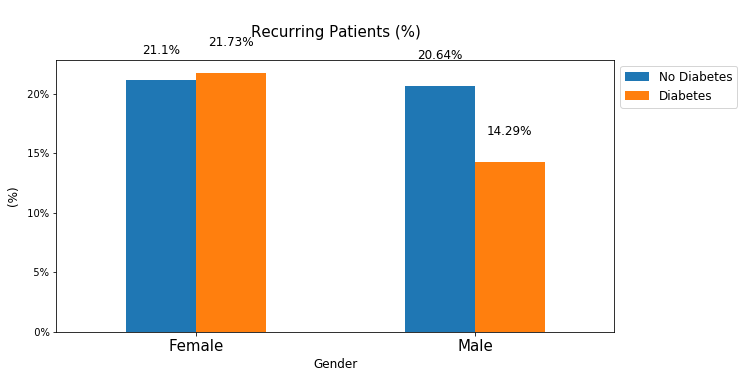

In [99]:
Recurring_Patient_prct(NoShow_df,'Gender','Diabetes')

##### Observations

- 6.97% of the '*NoShowUp*' appointments belong to female patients who experiance diabetes.
- 5.35% of the '*NoShowUp*' appointments belong to male patients who experiance diabetes.

Looking at the *Recurring patients (%)* chart, we found that:

- The proportion of female recurring patients with diabetes (21.73%) is greater than those with no diabetes (21.1%).
- The proportion of male recurring patients with no diabetes (20.64%) is greater than those with diabetes (4.29%).

Alcoholism,No Alcoholism,Alcoholism
Gender,,
Female,97.89,2.11
Male,95.22,4.78


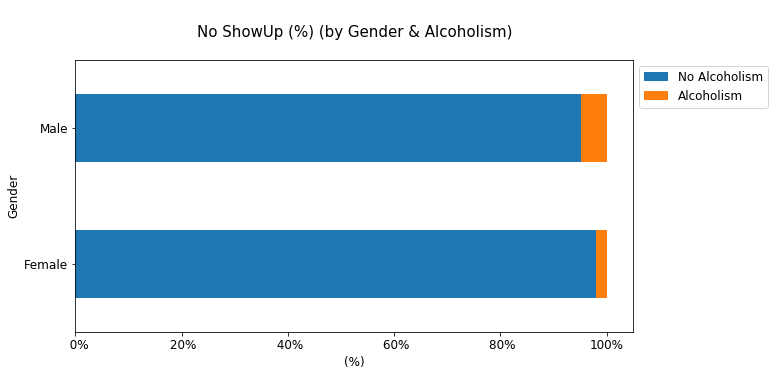

In [100]:
# NoShowUp% by gender and alcoholism

NoShowBy2Vars(NoShow_df,'Gender' ,'Alcoholism')

Alcoholism,No Alcoholism,Alcoholism
Gender,,
Female,21.08,24.03
Male,20.19,22.49


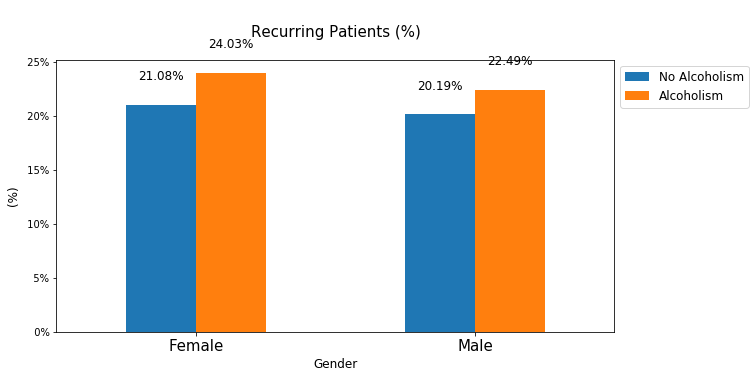

In [101]:
Recurring_Patient_prct(NoShow_df,'Gender','Alcoholism')

##### Observations

- 2.11% of the '*NoShowUp*' appointments belong to female patients who experiance alcoholism.
- 4.78% of the '*NoShowUp*' appointments belong to male patients who experiance alcoholism.

Looking at the *Recurring patients (%)* chart, we found that:

- The female proportion of recurring patients with diabetes (21.73%) is greater than those with no diabetes (21.1%).
- The male proportion of recurring patients with no diabetes (20.64%) is greater than those with diabetes (4.29%).

Handicap,No Handicap,Handicap L1,Handicap L2,Handicap L3,Handicap L4
Gender,,,,,
Female,98.34,1.48,0.17,0.00,0.01
Male,97.89,1.92,0.16,0.04,0.00


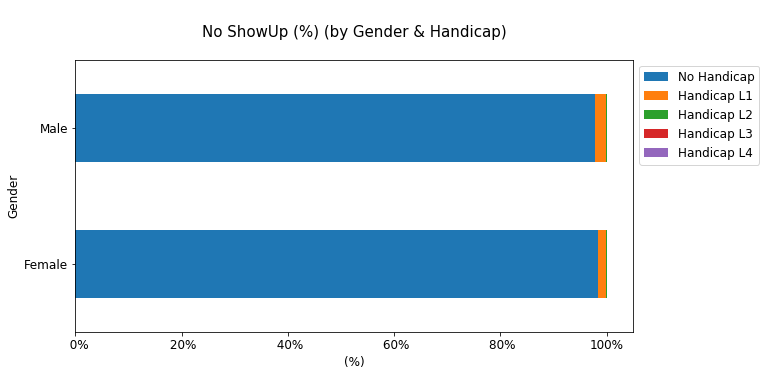

In [102]:
# NoShowUp % by gender and handicap level

NoShowBy2Vars(NoShow_df,'Gender' ,'Handicap')

Handicap,No Handicap,Handicap L1,Handicap L2,Handicap L3,Handicap L4
Gender,,,,,
Female,20.94,33.33,36.00,NaN,0.0
Male,20.12,31.08,8.33,0.0,NaN


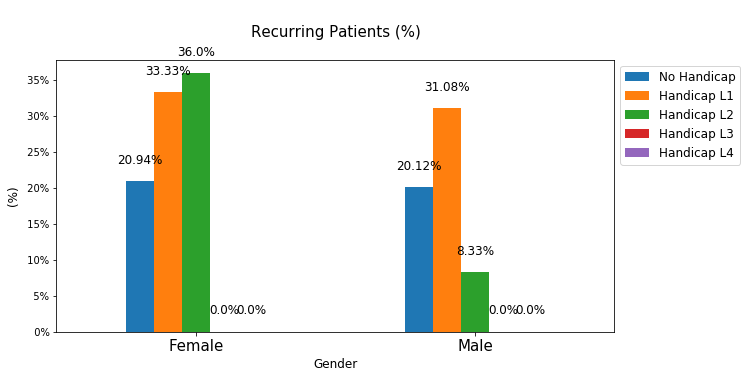

In [103]:
Recurring_Patient_prct(NoShow_df,'Gender','Handicap')

##### Observations

- 98.34% of the '*NoShowUp*' appointments belong to female patients without any Handicap.
- 97.89% of the '*NoShowUp*' appointments belong to male patients without any Handicap.

Looking at the *Recurring patients (%)* chart, we found that:

- The female recurring patients with Handicap L2 have the greatest proportion of (36%).
- The male recurring patients with Handicap L1 have the greatest proportion of (31.08%).

SMS_received,No SMS_received,SMS_received
Gender,,
Female,53.94,46.06
Male,60.33,39.67


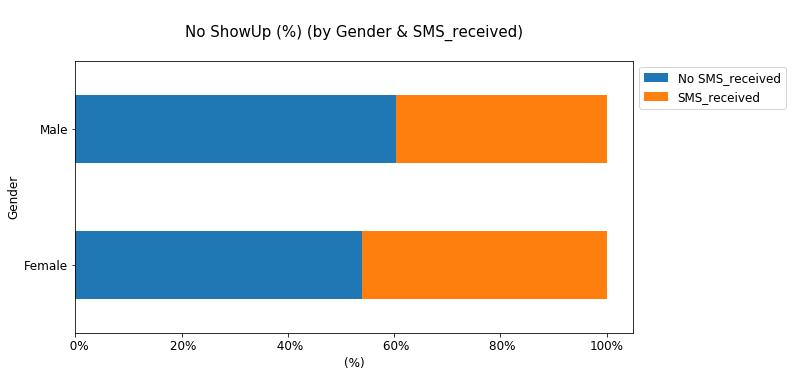

In [104]:
# NoShowUp% by gender and SMS reminder

NoShowBy2Vars(NoShow_df,'Gender' ,'SMS_received')

SMS_received,No SMS_received,SMS_received
Gender,,
Female,15.68,11.03
Male,18.24,8.32


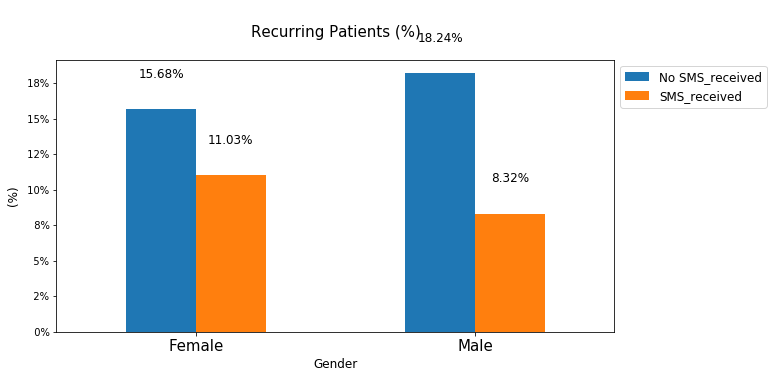

In [105]:
Recurring_Patient_prct(NoShow_df,'Gender','SMS_received')

##### Observations

- 53.94% of the '*NoShowUp*' appointments belong to female patients who didn't receive an SMS Reminder.
- 60.33% of the '*NoShowUp*' appointments belong to male patients who didn't receive an SMS Reminder.

Looking at the *Recurring patients (%)* chart, we found that:

- The female recurring patients that didn't receive an SMS reminder have the greatest proportion of (15.68%).
- The male recurring patients that didn't receive an SMS reminder have the greatest proportion of (18.24%).

DayofWeek,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
Gender,,,,,,
Female,21.25,23.45,22.60,14.75,17.90,0.05
Male,20.56,22.39,23.23,15.34,18.45,0.03


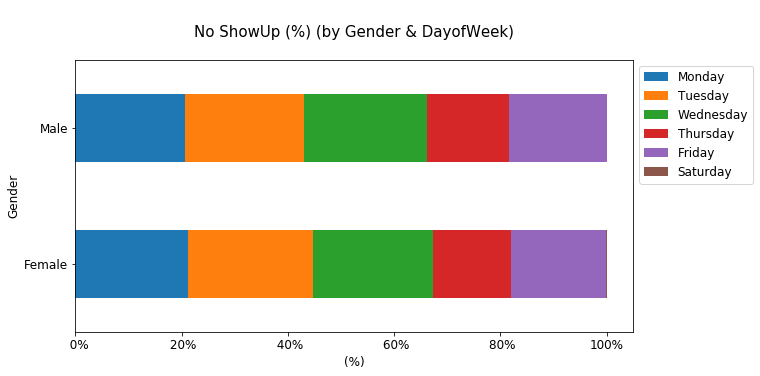

In [106]:
# NoShowUp% by gender and Day of week

NoShowBy2Vars(NoShow_df,'Gender' ,'DayofWeek')

DayofWeek,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
Gender,,,,,,
Female,10.77,11.37,11.34,6.88,9.84,0.0
Male,9.45,13.19,13.82,9.79,13.05,0.0


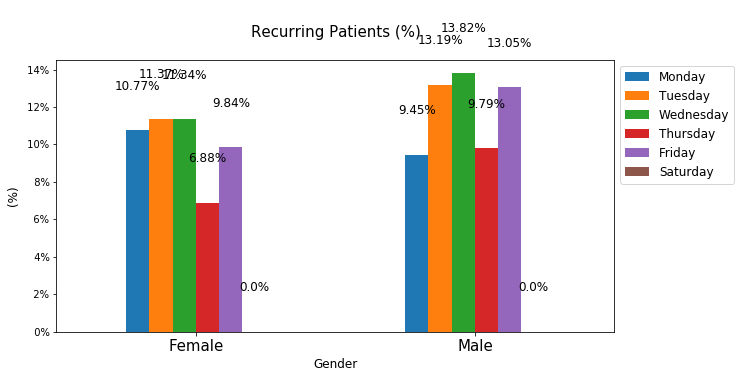

In [107]:
Recurring_Patient_prct(NoShow_df,'Gender','DayofWeek')

##### Observations

- 23.45% of the '*NoShowUp*' appointments belong to female patients scheduled to come on a Tuesday.
- 23.23% of the '*NoShowUp*' appointments belong to male patients scheduled to come on a Wednesday.

Looking at the *Recurring patients (%)* chart, we found that:

- The female recurring patients that were scheduled on a Tuesday have the greatest proportion of (11.37%).
- The male recurring patients that were scheduled on a Wednesday have the greatest proportion of (13.82%).

AgeGroup,0 - 19,20 - 39,40 - 59,60 - 79,80 - 99,100 - 119
Gender,,,,,,
Female,24.60,33.23,26.82,12.82,2.50,0.02
Male,40.79,23.68,22.56,10.63,2.34,0.00


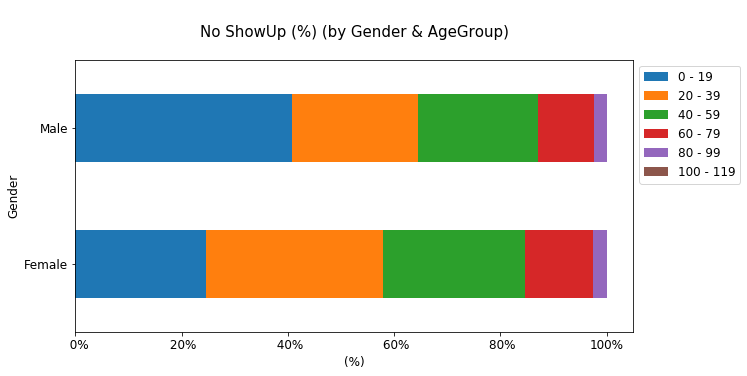

In [108]:
# NoShowUp% by gender and Age Group

NoShowBy2Vars(NoShow_df,'Gender' ,'AgeGroup')

AgeGroup,0 - 19,20 - 39,40 - 59,60 - 79,80 - 99,100 - 119
Gender,,,,,,
Female,20.09,21.80,22.1,19.45,19.73,66.67
Male,22.25,21.16,17.8,16.20,19.34,NaN


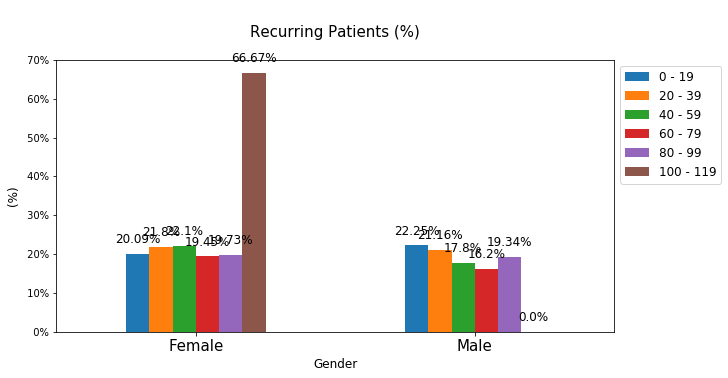

In [109]:
Recurring_Patient_prct(NoShow_df,'Gender','AgeGroup')

##### Observations

- 33.23% of the '*NoShowUp*' appointments belong to female patients from the age group (20-39yrs).
- 40.79% of the '*NoShowUp*' appointments belong to male patients from the age group (0-19yrs).

Looking at the *Recurring patients (%)* chart, we found that:

- The female recurring patients from the age group (100 - 119) have the greatest proportion of (66.67%).
- The male recurring patients from the age group (0 - 19) have the greatest proportion of (22.25%).

Neighbourhood,ANDORINHAS,BONFIM,CARATOÍRA,CENTRO,DA PENHA,ILHA DO PRÍNCIPE,ITARARÉ,JABOUR,JARDIM CAMBURI,JARDIM DA PENHA,JESUS DE NAZARETH,MARIA ORTIZ,NOVA PALESTINA,RESISTÊNCIA,ROMÃO,SANTA MARTHA,SANTO ANDRÉ,SANTO ANTÔNIO,SÃO PEDRO,TABUAZEIRO
Gender,,,,,,,,,,,,,,,,,,,,
Female,4.02,4.39,4.44,4.63,3.52,4.03,7.03,3.84,11.61,4.82,5.15,9.25,3.05,6.64,3.67,3.9,4.34,3.56,3.80,4.32
Male,3.93,3.86,4.69,6.81,2.84,4.15,7.13,2.70,10.45,4.85,5.67,9.49,3.13,7.48,3.55,3.6,3.02,3.93,4.22,4.49


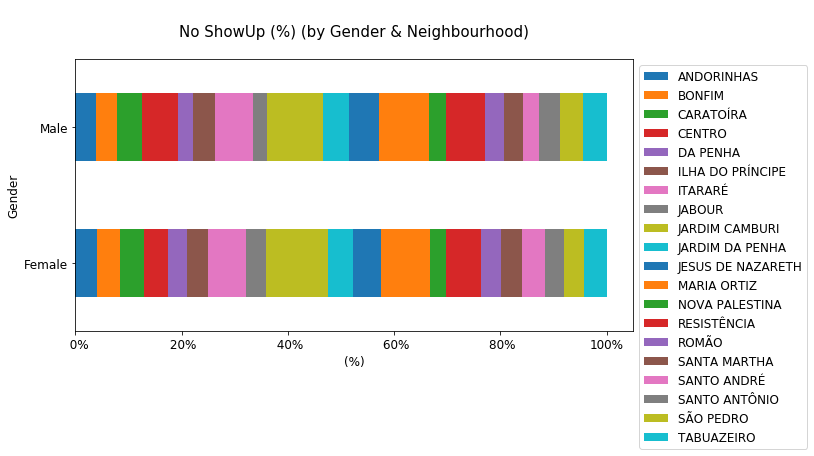

In [110]:
# NoShowUp% by gender and neighbourhood

NoShowBy2Vars(df_top_20_Nbrhd_NoShow,'Gender' ,'Neighbourhood')

Neighbourhood,ANDORINHAS,BONFIM,CARATOÍRA,CENTRO,DA PENHA,ILHA DO PRÍNCIPE,ITARARÉ,JABOUR,JARDIM CAMBURI,JARDIM DA PENHA,JESUS DE NAZARETH,MARIA ORTIZ,NOVA PALESTINA,RESISTÊNCIA,ROMÃO,SANTA MARTHA,SANTO ANDRÉ,SANTO ANTÔNIO,SÃO PEDRO,TABUAZEIRO
Gender,,,,,,,,,,,,,,,,,,,,
Female,29.57,18.04,18.11,20.1,21.19,30.06,23.51,16.06,22.57,14.73,24.43,19.77,17.18,24.04,25.71,18.51,35.12,16.01,24.54,17.79
Male,28.41,17.92,20.48,22.3,14.96,28.49,17.55,8.26,22.65,15.67,20.47,14.59,22.14,25.97,22.01,18.63,21.48,23.86,14.81,20.90


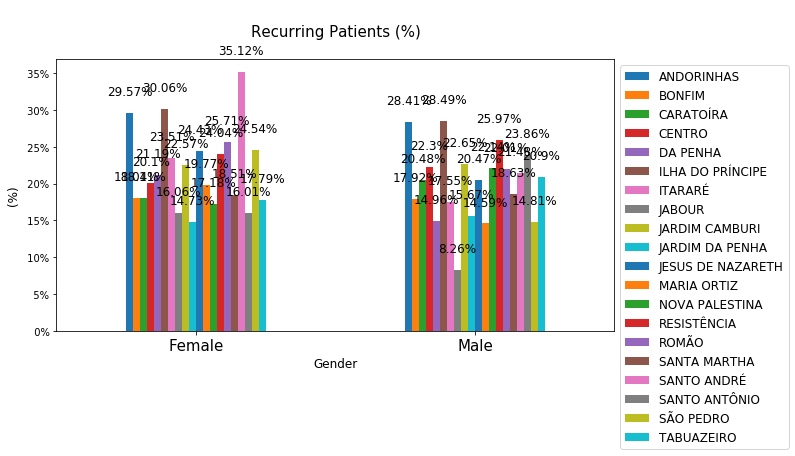

In [111]:
Recurring_Patient_prct(df_top_20_Nbrhd_NoShow,'Gender' ,'Neighbourhood')

##### Observations

- 11.61% of the '*NoShowUp*' appointments belong to female patients based in JARDIM CAMBURI.
- 10.45% of the '*NoShowUp*' appointments belong to male patients based in JARDIM CAMBURI.

Looking at the *Recurring patients (%)* chart, we found that:

- The female recurring patients based in SANTO ANDRÉ have the greatest proportion of (35.12%).
- The male recurring patients based in ILHA DO PRÍNCIPE have the greatest proportion of (28.49%).

WaitingDurationGroups,0 - 29,30 - 59,60 - 89,90 - 119,120 - 149,150 - 179
Gender,,,,,,
Female,84.05,12.98,2.62,0.23,0.05,0.07
Male,83.36,14.13,2.25,0.10,0.05,0.10


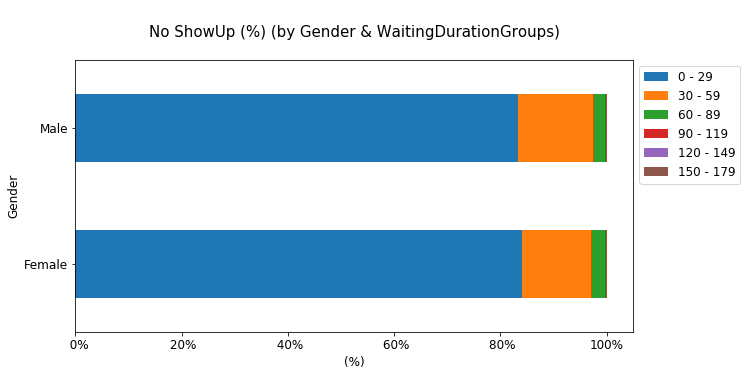

In [112]:
# NoShowUp% by gender and waiting duration

NoShowBy2Vars(NoShow_df,'Gender' ,'WaitingDurationGroups')

WaitingDurationGroups,0 - 29,30 - 59,60 - 89,90 - 119,120 - 149,150 - 179
Gender,,,,,,
Female,20.26,9.35,6.01,0.0,0.0,0.0
Male,20.33,7.88,10.34,0.0,0.0,12.5


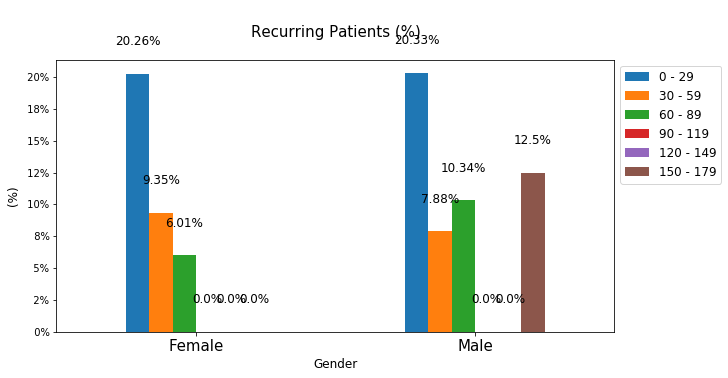

In [113]:
Recurring_Patient_prct(NoShow_df,'Gender' ,'WaitingDurationGroups')

##### Observations

- 84.05% of the '*NoShowUp*' appointments belong to female patients who have a waiting duration between (0-29days).
- 83.36% of the '*NoShowUp*' appointments belong to male patients who have a waiting duration between (0-29days).

Looking at the *Recurring patients (%)* chart, we found that:

- The female recurring patients who have a waiting duration between 0 - 29 days have the greatest proportion of (20.26%).
- The male recurring patients who have a waiting duration between 0 - 29 days have the greatest proportion of (20.33%).

##### Age Groups

Scholarship,No Scholarship,Scholarship
AgeGroup,,
0 - 19,87.55,12.45
20 - 39,84.77,15.23
40 - 59,88.90,11.10
60 - 79,96.55,3.45
80 - 99,99.82,0.18
100 - 119,100.00,0.00


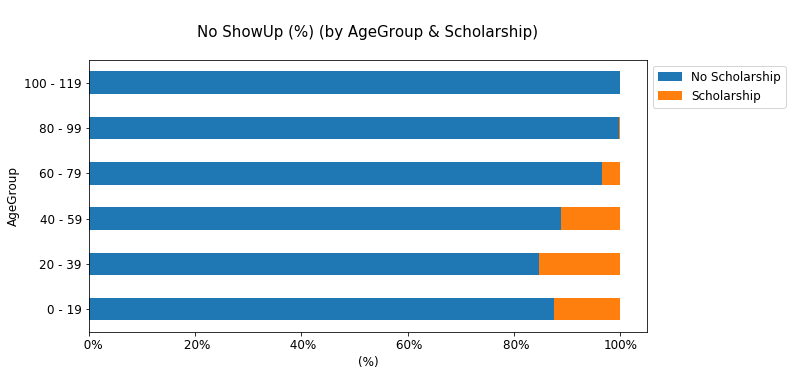

In [115]:
# NoShowUp% by age group and scholarship

NoShowBy2Vars(NoShow_df,'AgeGroup' ,'Scholarship')

Scholarship,No Scholarship,Scholarship
AgeGroup,,
0 - 19,20.36,26.34
20 - 39,20.92,25.57
40 - 59,20.19,25.48
60 - 79,18.35,21.51
80 - 99,19.63,0.00
100 - 119,66.67,NaN


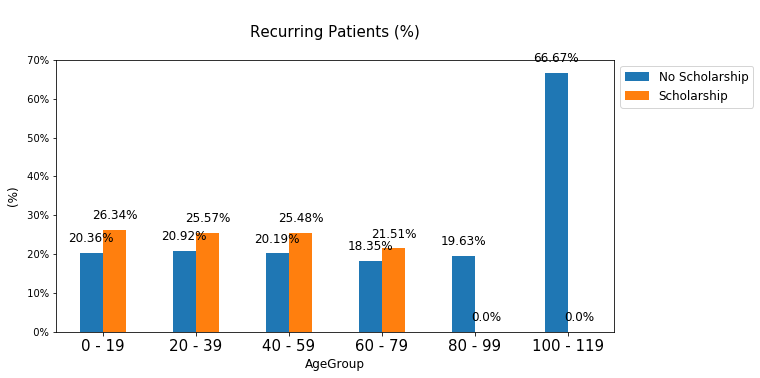

In [116]:
Recurring_Patient_prct(NoShow_df,'AgeGroup' ,'Scholarship')

##### Observations

- Age group (20-39) has the highest percentage (15.23%) of NoShow appointments where patients have a scholarship.
- Age group (100 - 119) has the highest percentage (100%) of NoShow appointments where patients have no scholarship.

Looking at the *Recurring patients (%)* chart, we found that:

- Age group (0-19) has the highest percentage (26.34%) of recurring patients who have a scholarship.
- Age group (100-119) has the highest percentage (66.67%) of recurring patients who have no scholarship.

Hypertension,No Hypertension,Hypertension
AgeGroup,,
0 - 19,99.81,0.19
20 - 39,95.31,4.69
40 - 59,72.19,27.81
60 - 79,44.28,55.72
80 - 99,31.68,68.32
100 - 119,100.00,0.00


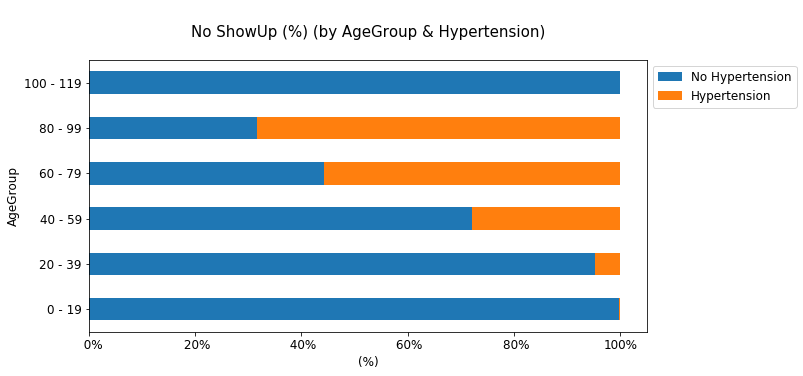

In [117]:
# NoShowUp% by age group and hypertension
NoShowBy2Vars(NoShow_df,'AgeGroup' ,'Hypertension')

Hypertension,No Hypertension,Hypertension
AgeGroup,,
0 - 19,21.07,38.46
20 - 39,21.56,23.00
40 - 59,20.55,21.36
60 - 79,19.38,17.73
80 - 99,19.08,19.84
100 - 119,66.67,NaN


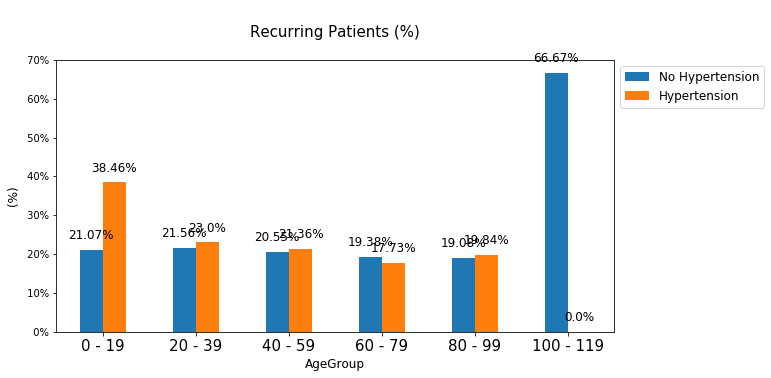

In [118]:
Recurring_Patient_prct(NoShow_df,'AgeGroup' ,'Hypertension')

##### Observations

- Age group (0-19) has the highest percentage (38.46%) of NoShow appointments where patients have hypertenion.
- Age group (100 - 119) has the highest percentage (66.67%) of NoShow appointments where patients have no hypertenion.

Looking at the *Recurring patients (%)* chart, we found that:

- Age group (0-19) has the highest percentage (38.46%) of recurring patients who have hypertension.
- Age group (100-119) has the highest percentage (66.67%) of recurring patients who have no hypertenion.

Diabetes,No Diabetes,Diabetes
AgeGroup,,
0 - 19,99.76,0.24
20 - 39,98.49,1.51
40 - 59,90.43,9.57
60 - 79,76.00,24.00
80 - 99,76.92,23.08
100 - 119,100.00,0.00


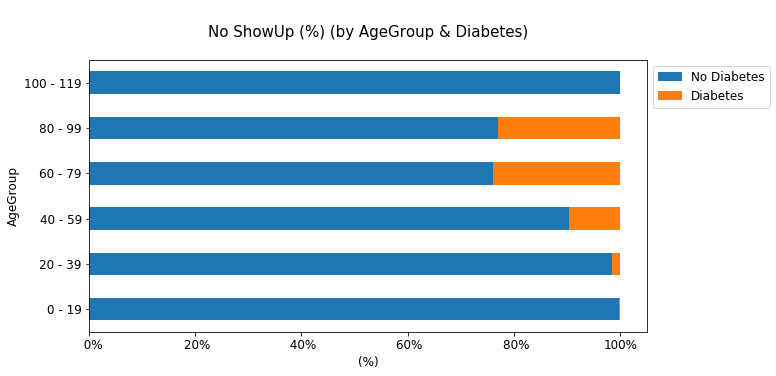

In [119]:
# NoSowUp% by age group and diabetes
NoShowBy2Vars(NoShow_df,'AgeGroup' ,'Diabetes')

Diabetes,No Diabetes,Diabetes
AgeGroup,,
0 - 19,21.11,18.75
20 - 39,21.68,17.82
40 - 59,20.80,20.52
60 - 79,18.18,19.35
80 - 99,20.00,18.25
100 - 119,66.67,NaN


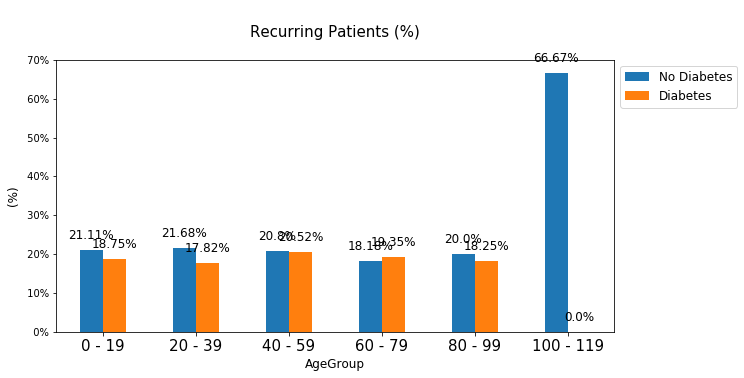

In [120]:
Recurring_Patient_prct(NoShow_df,'AgeGroup' ,'Diabetes')

##### Observations

- Age group (60 - 79) has the highest percentage (24%) of NoShow appointments where patients have diabetes.
- Age group (100 - 119) has the highest percentage (100%) of NoShow appointments where patients have no diabetes.

Looking at the *Recurring patients (%)* chart, we found that:

- Age group (40 - 59) has the highest percentage (20.52%) of recurring patients who have diabetes.
- Age group (100-119) has the highest percentage (66.67%) of recurring patients who have no diabetes.

Alcoholism,No Alcoholism,Alcoholism
AgeGroup,,
0 - 19,99.81,0.19
20 - 39,97.29,2.71
40 - 59,93.39,6.61
60 - 79,95.99,4.01
80 - 99,99.82,0.18
100 - 119,100.00,0.00


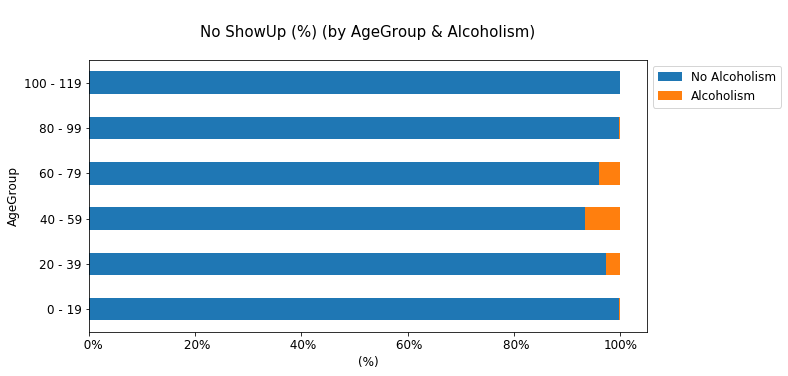

In [121]:
# NoShowUp% by age group and alcoholism
NoShowBy2Vars(NoShow_df,'AgeGroup' ,'Alcoholism')

Alcoholism,No Alcoholism,Alcoholism
AgeGroup,,
0 - 19,21.02,61.54
20 - 39,21.56,23.76
40 - 59,20.58,23.53
60 - 79,18.54,16.67
80 - 99,19.63,0.00
100 - 119,66.67,NaN


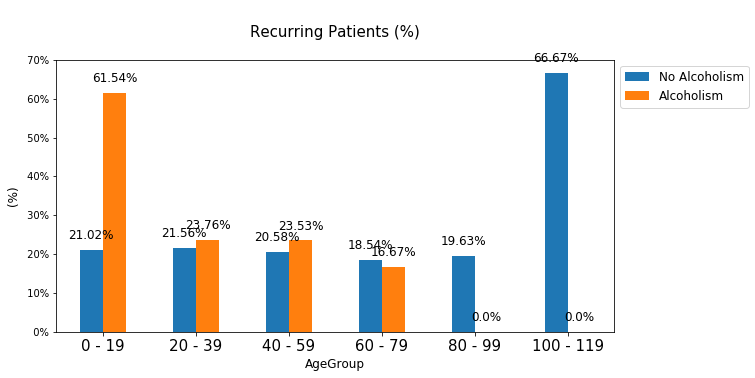

In [122]:
Recurring_Patient_prct(NoShow_df,'AgeGroup' ,'Alcoholism')

##### Observations

- Age group (40 - 59) has the highest percentage (6.61%) of NoShow appointments where patients are alcoholic.
- Age group (100 - 119) has the highest percentage (100%) of NoShow appointments where patients are not alcoholic.

Looking at the *Recurring patients (%)* chart, we found that:

- Age group (0 - 19) has the highest percentage (61.54%) of recurring patients who are alcoholic.
- Age group (100 - 119) has the highest percentage (66.67%) of recurring patients who are not alcoholic.

Handicap,No Handicap,Handicap L1,Handicap L2,Handicap L3,Handicap L4
AgeGroup,,,,,
0 - 19,98.86,1.04,0.06,0.03,0.01
20 - 39,98.88,1.03,0.09,0.00,0.00
40 - 59,97.95,1.89,0.16,0.00,0.00
60 - 79,96.99,2.79,0.19,0.04,0.00
80 - 99,90.29,7.33,2.38,0.00,0.00
100 - 119,0.00,100.00,0.00,0.00,0.00


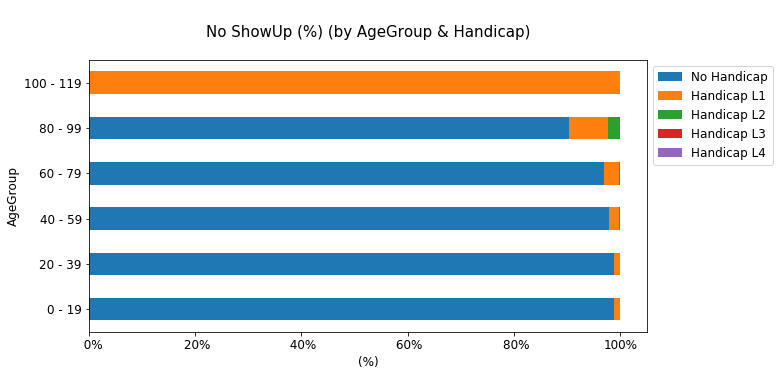

In [123]:
# NoShowUp% by age group and handicap
NoShowBy2Vars(NoShow_df,'AgeGroup' ,'Handicap')

Handicap,No Handicap,Handicap L1,Handicap L2,Handicap L3,Handicap L4
AgeGroup,,,,,
0 - 19,20.85,47.14,0.00,0.0,0.0
20 - 39,21.44,39.13,16.67,NaN,NaN
40 - 59,20.70,24.30,22.22,NaN,NaN
60 - 79,18.31,25.33,0.00,0.0,NaN
80 - 99,18.05,27.50,53.85,NaN,NaN
100 - 119,NaN,66.67,NaN,NaN,NaN


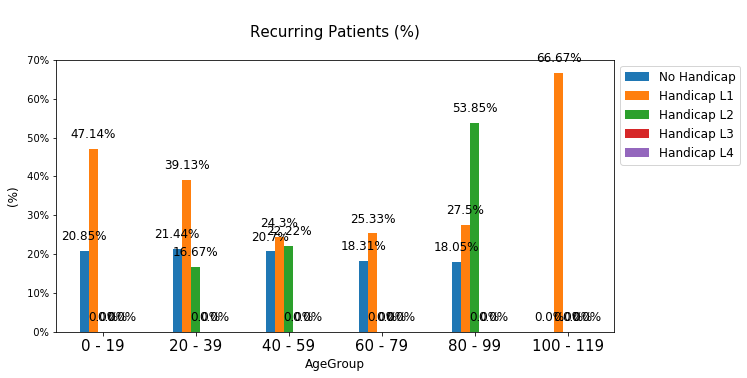

In [124]:
Recurring_Patient_prct(NoShow_df,'AgeGroup' ,'Handicap')

##### Observations

- Age group (20 - 39) has the highest percentage (98.88%) of NoShow appointments where patients have no Handicap.
- Age group (100 - 119) has the highest percentage (100%) of NoShow appointments where patients have Handicap L1.

Looking at the *Recurring patients (%)* chart, we found that:

- Age group (20 - 39) has the highest percentage (21.44%) of recurring patients who have no Handicap.
- Age group (100 - 119) has the highest percentage (66.67%) of recurring patients who have Handicap L1.

SMS_received,No SMS_received,SMS_received
AgeGroup,,
0 - 19,58.87,41.13
20 - 39,51.15,48.85
40 - 59,56.24,43.76
60 - 79,59.25,40.75
80 - 99,67.40,32.60
100 - 119,100.00,0.00


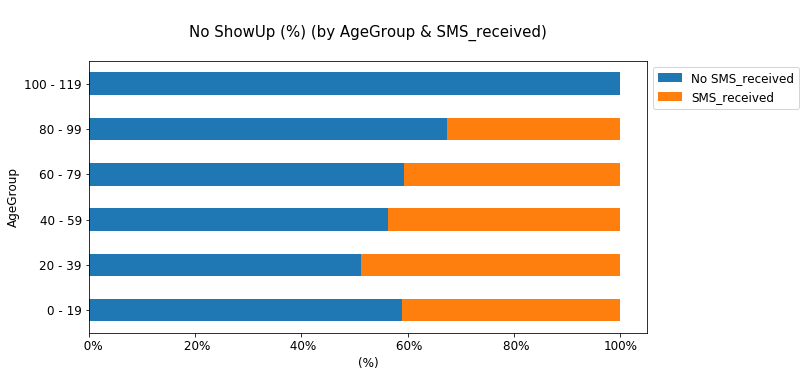

In [125]:
# NoShowUp% by age group and sms received
NoShowBy2Vars(NoShow_df,'AgeGroup' ,'SMS_received')

SMS_received,No SMS_received,SMS_received
AgeGroup,,
0 - 19,19.31,8.80
20 - 39,16.42,11.01
40 - 59,15.22,10.75
60 - 79,13.04,9.39
80 - 99,16.85,11.80
100 - 119,66.67,NaN


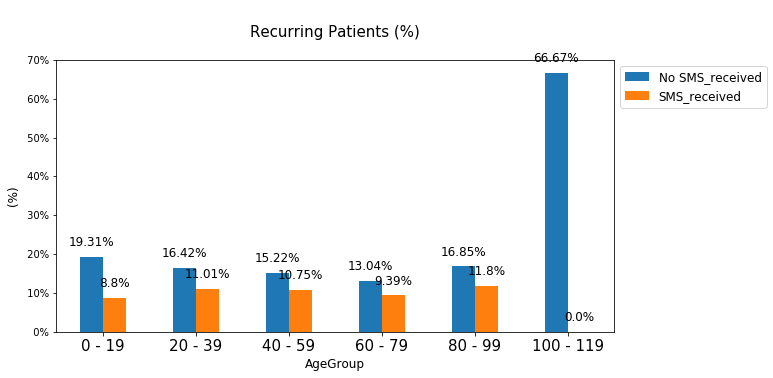

In [126]:
Recurring_Patient_prct(NoShow_df,'AgeGroup' ,'SMS_received')

##### Observations

- Age group (20 - 39) has the highest percentage (48.85%) of NoShow appointments where patients received an SMS reminder.
- Age group (100 - 119) has the highest percentage (100%) of NoShow appointments where patients didn't receive an SMS reminder.

Looking at the *Recurring patients (%)* chart, we found that:

- Age group (80 - 99) has the highest percentage (11.80%) of recurring patients who received an SMS reminder.
- Age group (100 - 119) has the highest percentage (66.67%) of recurring patients who didn't receive an SMS reminder.

DayofWeek,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
AgeGroup,,,,,,
0 - 19,20.36,21.93,24.04,14.97,18.68,0.01
20 - 39,20.96,23.47,22.85,14.54,18.15,0.03
40 - 59,21.92,23.57,21.71,15.28,17.49,0.04
60 - 79,21.66,23.48,21.43,15.49,17.83,0.11
80 - 99,17.03,25.64,25.82,13.55,17.77,0.18
100 - 119,33.33,0.00,0.00,66.67,0.00,0.00


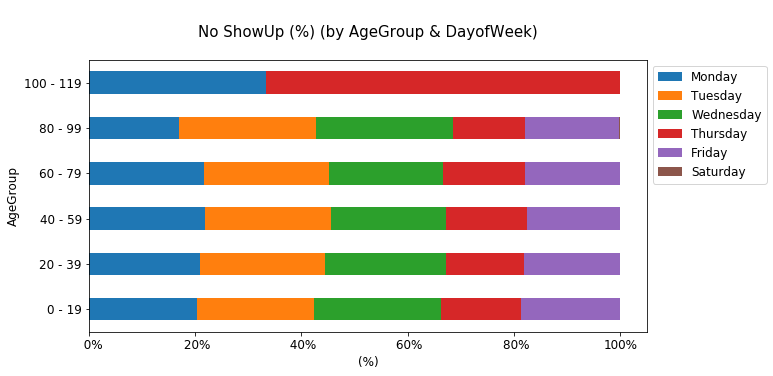

In [127]:
# NoShowUp% by age group and day of the week
NoShowBy2Vars(NoShow_df,'AgeGroup' ,'DayofWeek')

DayofWeek,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
AgeGroup,,,,,,
0 - 19,7.94,11.43,17.35,10.31,14.54,0.0
20 - 39,10.50,11.93,10.55,7.72,10.15,0.0
40 - 59,13.31,11.85,9.61,5.21,9.91,0.0
60 - 79,9.43,12.66,6.93,8.39,6.46,0.0
80 - 99,8.60,15.71,14.89,5.41,8.25,0.0
100 - 119,0.00,NaN,NaN,50.00,NaN,NaN


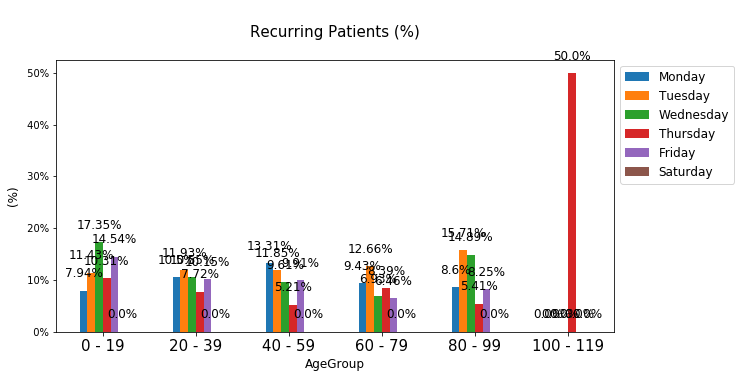

In [128]:
Recurring_Patient_prct(NoShow_df,'AgeGroup' ,'DayofWeek')

##### Observations

- Age group (100 - 119) has the highest percentage (66.67%) of NoShow appointments where patients were scheduled on a Thursday.

Looking at the *Recurring patients (%)* chart, we found that:

- Age group (100 - 119) has the highest percentage (50%) of recurring patients who were scheduled on a Thursday.

WaitingDurationGroups,0 - 29,30 - 59,60 - 89,90 - 119,120 - 149,150 - 179
AgeGroup,,,,,,
0 - 19,82.99,15.30,1.53,0.15,0.03,0.00
20 - 39,84.52,13.27,2.11,0.07,0.00,0.03
40 - 59,83.88,13.30,2.49,0.18,0.07,0.09
60 - 79,84.40,9.62,5.20,0.33,0.15,0.30
80 - 99,81.87,10.26,5.86,1.28,0.18,0.55
100 - 119,66.67,33.33,0.00,0.00,0.00,0.00


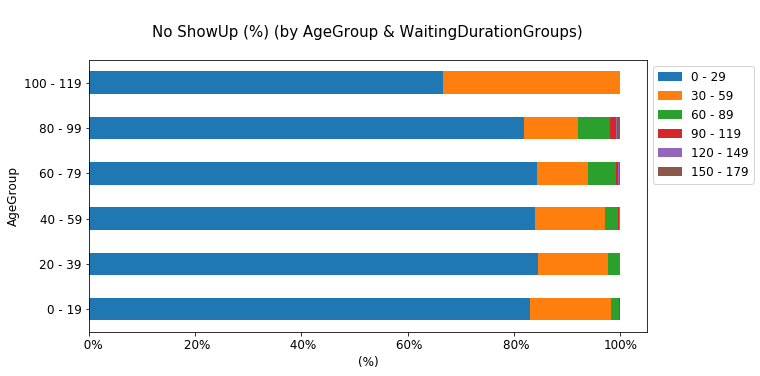

In [130]:
# NoShowUp% by age group and waiting duration
NoShowBy2Vars(NoShow_df,'AgeGroup' ,'WaitingDurationGroups')

WaitingDurationGroups,0 - 29,30 - 59,60 - 89,90 - 119,120 - 149,150 - 179
AgeGroup,,,,,,
0 - 19,21.67,5.43,9.71,0.0,0.0,NaN
20 - 39,20.71,10.38,10.64,0.0,NaN,0.0
40 - 59,19.37,11.44,4.96,0.0,0.0,0.0
60 - 79,18.27,7.72,3.57,0.0,0.0,12.5
80 - 99,16.78,16.07,12.50,0.0,0.0,0.0
100 - 119,50.00,0.00,NaN,NaN,NaN,NaN


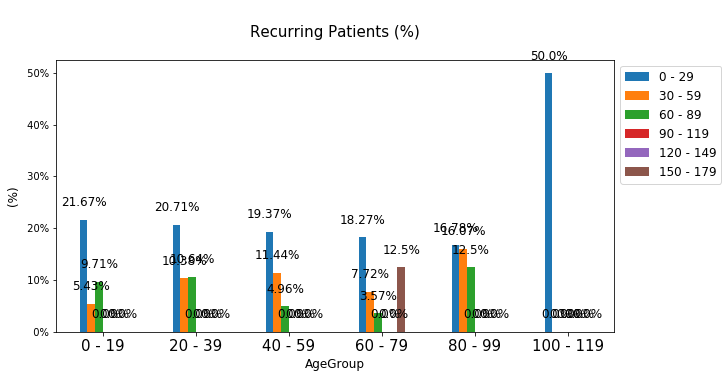

In [131]:
Recurring_Patient_prct(NoShow_df,'AgeGroup' ,'WaitingDurationGroups')

##### Observations

- Age group (20 - 39) has the highest percentage (84.52%) of NoShow appointments where patients had a waiting duration between 0 - 29 days.

Looking at the *Recurring patients (%)* chart, we found that:

- Age group (100 - 119) has the highest percentage (50%) of recurring patients who had a waiting duration between 0 - 29 days.

##### SMS Received

Neighbourhood,ANDORINHAS,BONFIM,CARATOÍRA,CENTRO,DA PENHA,ILHA DO PRÍNCIPE,ITARARÉ,JABOUR,JARDIM CAMBURI,JARDIM DA PENHA,JESUS DE NAZARETH,MARIA ORTIZ,NOVA PALESTINA,RESISTÊNCIA,ROMÃO,SANTA MARTHA,SANTO ANDRÉ,SANTO ANTÔNIO,SÃO PEDRO,TABUAZEIRO
SMS_received,,,,,,,,,,,,,,,,,,,,
No SMS_received,4.70,4.66,6.12,5.55,3.58,3.84,6.83,3.19,11.30,4.59,5.53,7.88,3.00,6.21,3.23,3.47,3.50,3.99,4.43,4.40
SMS_received,3.07,3.63,2.48,5.17,2.90,4.37,7.37,3.79,11.11,5.13,5.06,11.19,3.18,7.84,4.14,4.21,4.38,3.30,3.32,4.35


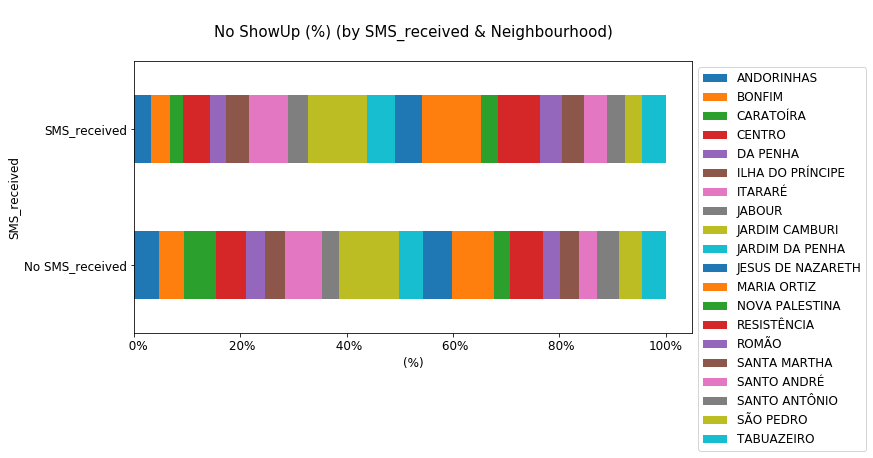

In [132]:
# NoShowUp% by sms received and neighbourhood
NoShowBy2Vars(df_top_20_Nbrhd_NoShow,'SMS_received' ,'Neighbourhood')

Neighbourhood,ANDORINHAS,BONFIM,CARATOÍRA,CENTRO,DA PENHA,ILHA DO PRÍNCIPE,ITARARÉ,JABOUR,JARDIM CAMBURI,JARDIM DA PENHA,JESUS DE NAZARETH,MARIA ORTIZ,NOVA PALESTINA,RESISTÊNCIA,ROMÃO,SANTA MARTHA,SANTO ANDRÉ,SANTO ANTÔNIO,SÃO PEDRO,TABUAZEIRO
SMS_received,,,,,,,,,,,,,,,,,,,,
No SMS_received,23.48,14.62,17.37,16.46,15.59,25.53,15.97,12.39,17.97,11.87,14.29,15.22,16.36,16.89,21.94,15.29,22.18,17.75,15.08,16.72
SMS_received,10.80,5.77,2.82,9.12,10.84,15.60,8.77,10.14,9.28,7.48,15.86,9.05,8.79,11.36,12.66,8.71,20.72,7.94,11.05,8.84


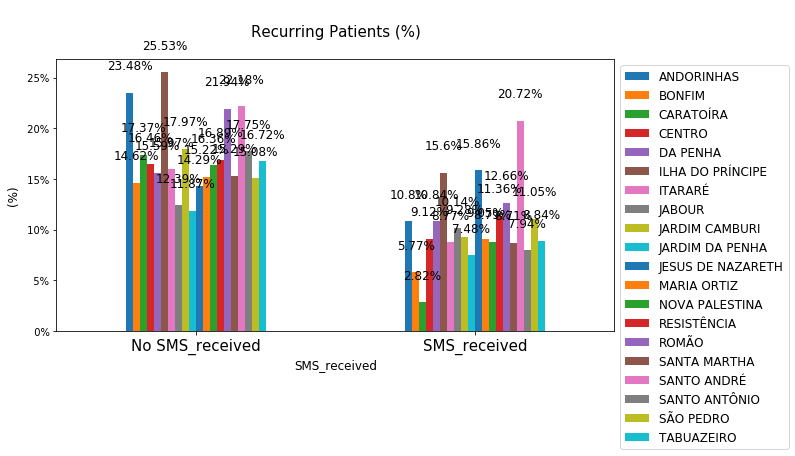

In [133]:
Recurring_Patient_prct(df_top_20_Nbrhd_NoShow,'SMS_received' ,'Neighbourhood')

##### Observations

- The greatest proportion (11.19%) of NoShow appointments where patients received an SMS reminder belongs to patients based in MARIA ORTIZ.
- The greatest proportion (11.30%) of NoShow appointments where patients didn't receive an SMS reminder belongs to patients based in JARDIM CAMBURI.

Looking at the *Recurring patients (%)* chart, we found that:

- The highest percentage (20.72%) of recurring patients who received an SMS reminder belongs to patients based in SANTO ANDRÉ.
- The highest percentage (25.53%) of recurring patients who didn't receive an SMS reminder belongs to patients based in ILHA DO PRÍNCIPE.

Scholarship,No Scholarship,Scholarship
SMS_received,,
No SMS_received,88.87,11.13
SMS_received,87.90,12.10


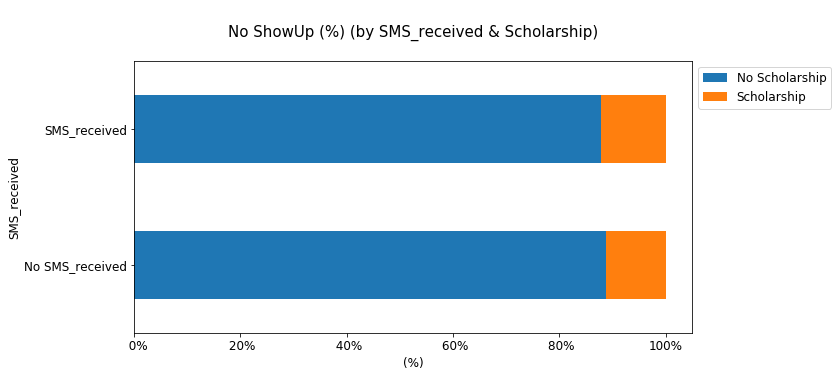

In [134]:
# NoShowUp% by sms received and scholarship
NoShowBy2Vars(NoShow_df,'SMS_received' ,'Scholarship')

Scholarship,No Scholarship,Scholarship
SMS_received,,
No SMS_received,16.09,20.95
SMS_received,9.72,13.51


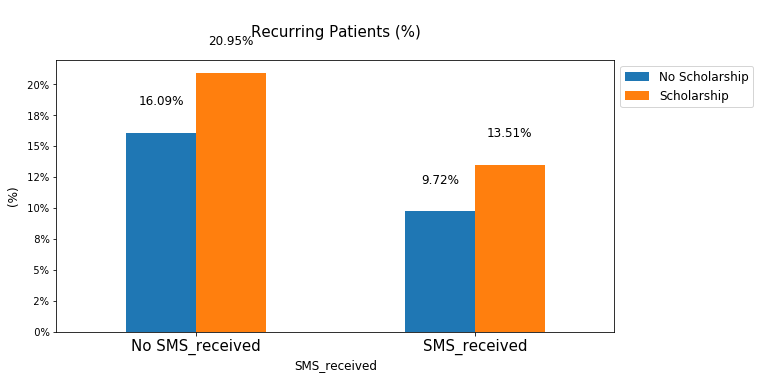

In [135]:
Recurring_Patient_prct(NoShow_df,'SMS_received' ,'Scholarship')

##### Observations

- The greatest proportion (87.90%) of NoShow appointments where patients received an SMS reminder belongs to patients who don't have a scholarship.
- The greatest proportion (88.87%) of NoShow appointments where patients didn't receive an SMS reminder belongs to patients who don't have a scholarship.

Looking at the *Recurring patients (%)* chart, we found that:

- The highest percentage (13.51%) of recurring patients who received an SMS reminder belongs to patients who have a scholarship
- The highest percentage (20.95%) of recurring patients who didn't receive an SMS reminder belongs to patients who have a scholarship.

Hypertension,No Hypertension,Hypertension
SMS_received,,
No SMS_received,82.23,17.77
SMS_received,84.21,15.79


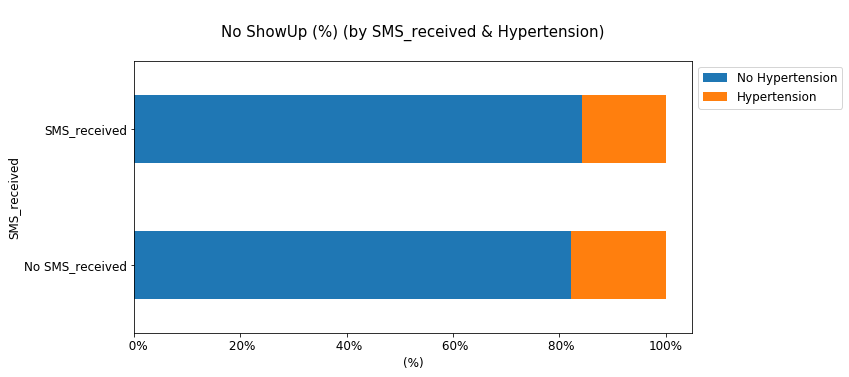

In [136]:
# NoShowUp% by sms received and hypertension
NoShowBy2Vars(NoShow_df,'SMS_received' ,'Hypertension')

Hypertension,No Hypertension,Hypertension
SMS_received,,
No SMS_received,17.01,14.86
SMS_received,10.04,10.94


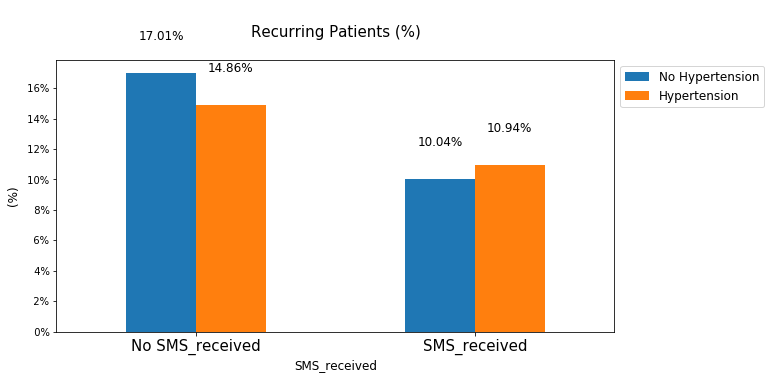

In [137]:
Recurring_Patient_prct(NoShow_df,'SMS_received' ,'Hypertension')

##### Observations

- The greatest proportion (84.21%) of NoShow appointments where patients received an SMS reminder belongs to patients who don't have hypertension.
- The greatest proportion (82.23%) of NoShow appointments where patients didn't receive an SMS reminder belongs to patients who don't have hypertension.

Looking at the *Recurring patients (%)* chart, we found that:

- The highest percentage (10.94%) of recurring patients who received an SMS reminder are to patients who have hypertension
- The highest percentage (17.01%) of recurring patients who didn't receive an SMS reminder are to patients who dont have hypertension.

Diabetes,No Diabetes,Diabetes
SMS_received,,
No SMS_received,92.93,7.07
SMS_received,94.44,5.56


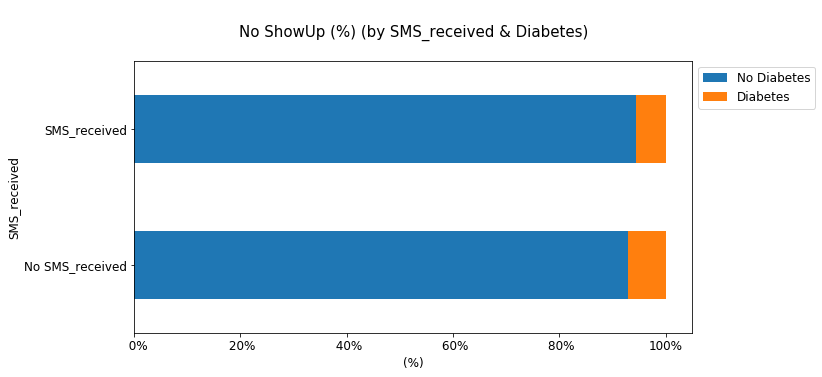

In [138]:
# NoShowUp% by sms received and diabetes
NoShowBy2Vars(NoShow_df,'SMS_received' ,'Diabetes')

Diabetes,No Diabetes,Diabetes
SMS_received,,
No SMS_received,16.84,13.88
SMS_received,10.25,9.01


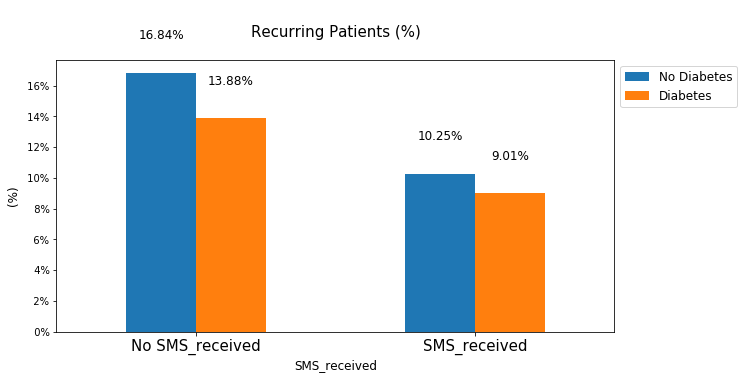

In [139]:
Recurring_Patient_prct(NoShow_df,'SMS_received' ,'Diabetes')

##### Observations

- The greatest proportion (94.44%) of NoShow appointments where patients received an SMS reminder are patients who don't have diabetes.
- The greatest proportion (92.93%) of NoShow appointments where patients didn't receive an SMS reminder are patients who don't have diabetes.

Looking at the *Recurring patients (%)* chart, we found that:

- The highest percentage (10.25%) of recurring patients who received an SMS reminder are patients who don't have diabetes
- The highest percentage (16.84%) of recurring patients who didn't receive an SMS reminder are patients who dont have diabetes.

Alcoholism,No Alcoholism,Alcoholism
SMS_received,,
No SMS_received,96.81,3.19
SMS_received,97.17,2.83


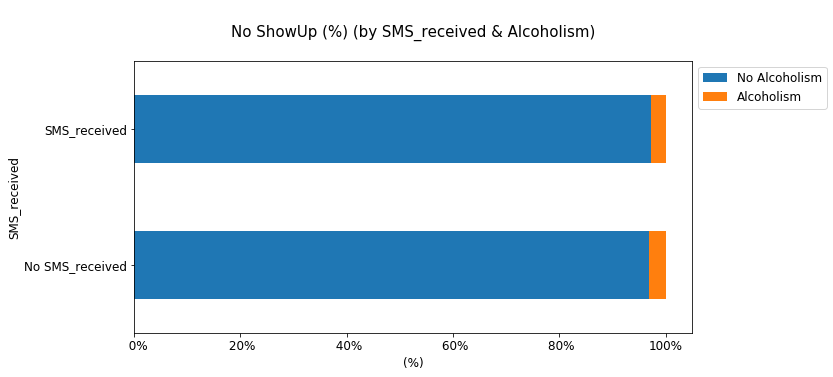

In [140]:
# NoShowUp% by sms received and alcoholism
NoShowBy2Vars(NoShow_df,'SMS_received' ,'Alcoholism')

Alcoholism,No Alcoholism,Alcoholism
SMS_received,,
No SMS_received,16.64,16.50
SMS_received,10.09,13.36


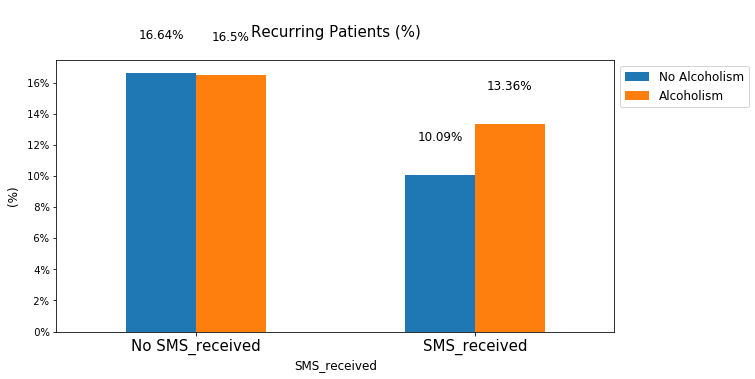

In [141]:
Recurring_Patient_prct(NoShow_df,'SMS_received' ,'Alcoholism')

##### Observations

- The greatest proportion (97.17%) of NoShow appointments where patients received an SMS reminder are patients who are not alcoholic.
- The greatest proportion (96.81%) of NoShow appointments where patients didn't receive an SMS reminder are patients who are not alcoholic.

Looking at the *Recurring patients (%)* chart, we found that:

- The highest percentage (13.36%) of recurring patients who received an SMS reminder are patients who are alcoholic.
- The highest percentage (16.64%) of recurring patients who didn't receive an SMS reminder are patients who are not alcoholic.

Handicap,No Handicap,Handicap L1,Handicap L2,Handicap L3,Handicap L4
SMS_received,,,,,
No SMS_received,97.85,1.90,0.24,0.02,0.00
SMS_received,98.62,1.29,0.07,0.01,0.01


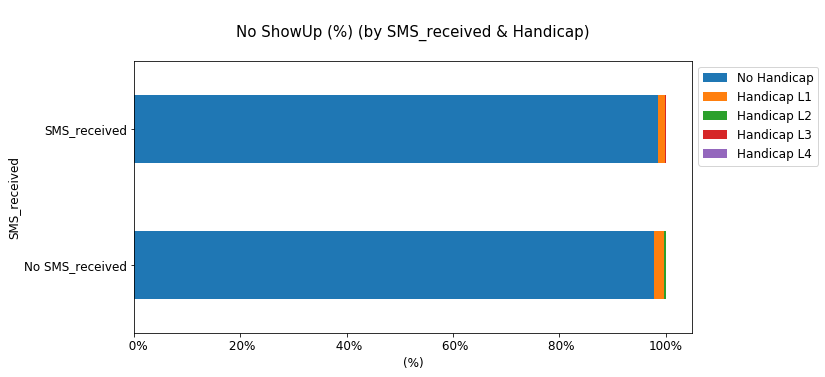

In [143]:
# NoShowUp% by sms received and handicap
NoShowBy2Vars(NoShow_df,'SMS_received' ,'Handicap')

Handicap,No Handicap,Handicap L1,Handicap L2,Handicap L3,Handicap L4
SMS_received,,,,,
No SMS_received,16.29,34.03,20.00,0.0,NaN
SMS_received,10.14,12.70,28.57,0.0,0.0


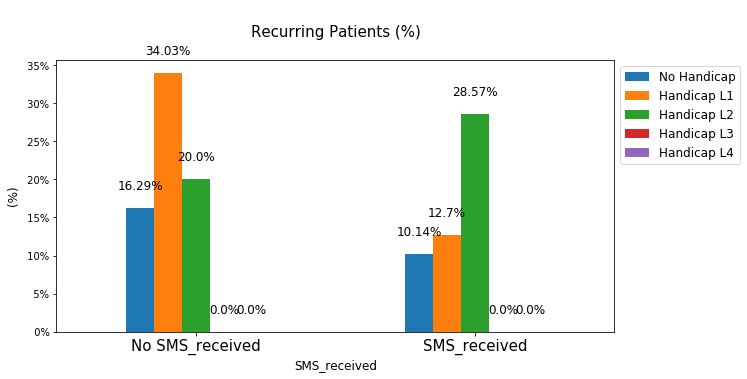

In [144]:
Recurring_Patient_prct(NoShow_df,'SMS_received' ,'Handicap')

##### Observations

- The greatest proportion (98.62%) of NoShow appointments where patients received an SMS reminder have a Handicap.
- The greatest proportion (97.85%) of NoShow appointments where patients didn't receive an SMS reminder don't have Handicap.

Looking at the *Recurring patients (%)* chart, we found that:

- The highest percentage (28.57%) of recurring patients who received an SMS reminder have Handicap L2.
- The highest percentage (34.03%) of recurring patients who didn't receive an SMS reminder have Handicap L1.

DayofWeek,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
SMS_received,,,,,,
No SMS_received,21.85,17.94,21.43,15.65,23.08,0.05
SMS_received,19.94,29.66,24.60,14.06,11.70,0.03


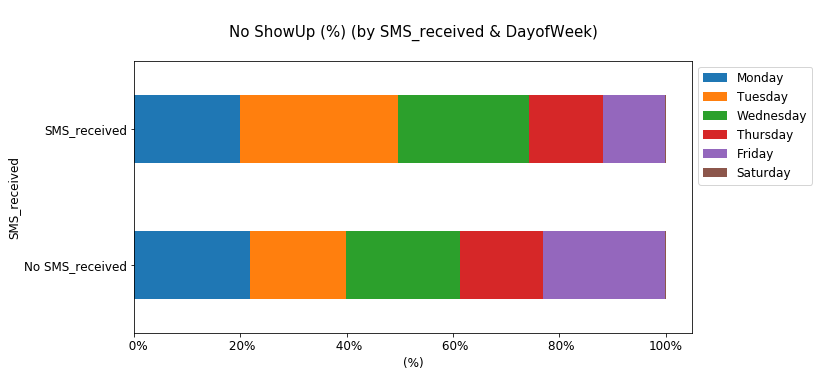

In [145]:
# NoShowUp% by sms received and day of the week
NoShowBy2Vars(NoShow_df,'SMS_received' ,'DayofWeek')

DayofWeek,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
SMS_received,,,,,,
No SMS_received,7.45,10.32,11.10,7.24,10.75,0.0
SMS_received,3.64,5.10,4.07,1.89,0.70,0.0


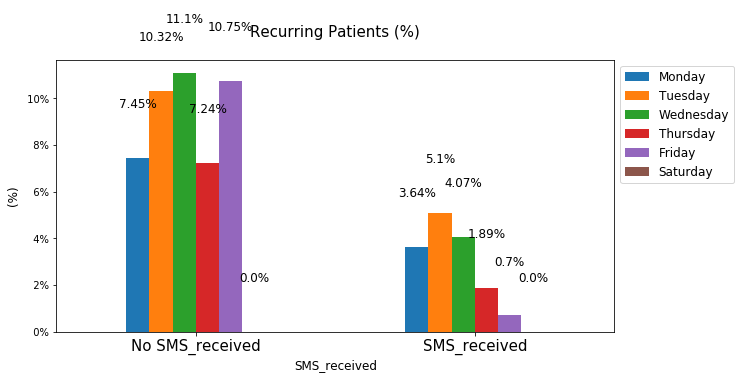

In [146]:
Recurring_Patient_prct(NoShow_df,'SMS_received' ,'DayofWeek')

##### Observations

- The greatest proportion (29.66%) of NoShow appointments where patients received an SMS reminder were scheduled to come on a Tuesday.
- The greatest proportion (23.08%) of NoShow appointments where patients didn't receive an SMS reminder were scheduled to come on a Friday.

Looking at the *Recurring patients (%)* chart, we found that:

- The highest percentage (5.10%) of recurring patients who received an SMS reminder were scheduled to come on a Tuesday.
- The highest percentage (11.10%) of recurring patients who didn't receive an SMS reminder were scheduled to come on a Wednesday.

WaitingDurationGroups,0 - 29,30 - 59,60 - 89,90 - 119,120 - 149,150 - 179
SMS_received,,,,,,
No SMS_received,87.42,10.41,2.01,0.08,0.04,0.04
SMS_received,79.19,17.18,3.12,0.32,0.06,0.13


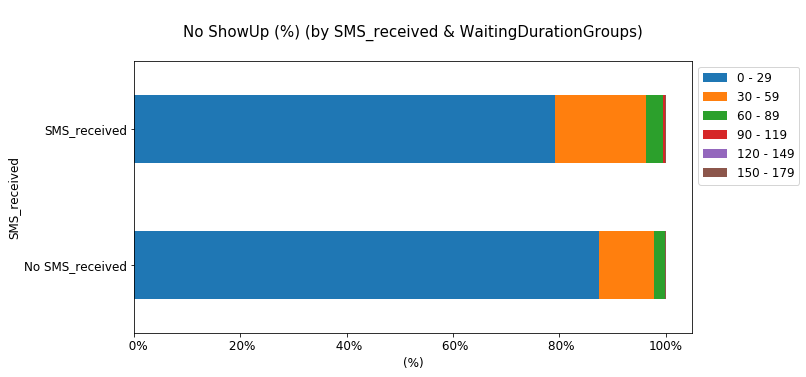

In [147]:
# NoShowUp% by sms received and waiting duration
NoShowBy2Vars(NoShow_df,'SMS_received' ,'WaitingDurationGroups')

WaitingDurationGroups,0 - 29,30 - 59,60 - 89,90 - 119,120 - 149,150 - 179
SMS_received,,,,,,
No SMS_received,16.73,6.21,5.56,0.0,0.0,0.0
SMS_received,9.14,3.39,1.31,0.0,0.0,0.0


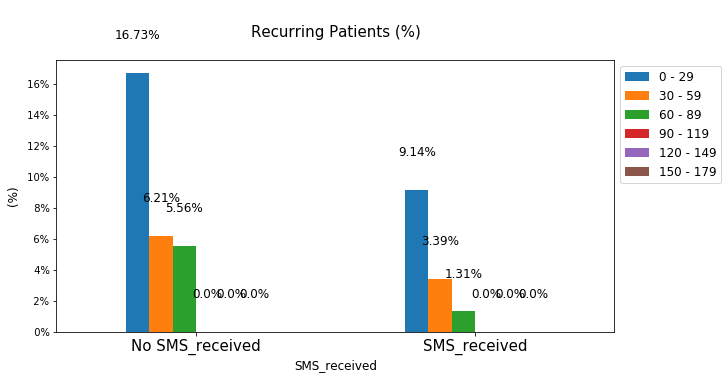

In [148]:
Recurring_Patient_prct(NoShow_df,'SMS_received' ,'WaitingDurationGroups')

##### Observations

- The greatest proportion (79.19%) of NoShow appointments where patients received an SMS reminder had a waiting duration between 0 - 29 days.
- The greatest proportion (87.42%) of NoShow appointments where patients didn't receive an SMS reminder had a waiting duration between 0 - 29 days.

Looking at the *Recurring patients (%)* chart, we found that:

- The highest percentage (9.14%) of recurring patients who received an SMS reminder had a waiting duration between 0 - 29 days.
- The highest percentage (16.73%) of recurring patients who didn't receive an SMS reminder had a waiting duration between 0 - 29 days.

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

This analysis is not meant to provide a final conclusion on the reasons leading to patients not showing up to their appointments, as it does not involve using any inferential statistics techniques/machine learning algorithms.


**Questions**

1. What is the overall appointment show-up vs. no show-up rate?
2. What are the proportions of the different categories within each variable and the show-up rates broken down by category?
3. For each pair of variables, calculate the proportions of category combinations to identify the largest group of patients who didn't show-up.


**Findings**

***A. Proportions***

1. The overall show-up rate is: 79.81%.

2. The (%) of female patients is greater than male patients (64.28% vs 35.72%).

3. The largest Age group is (0 - 19) years old with 28.89%, while the smallest is (100 - 119) years old with 0.01%.

4. The neighbourhood with the largest (%) of appointments is JARDIM CAMURI with 11.94%, while the neighbourhood with the largest number of patients is ANDORINHAS with 3.12% of the total number of patients (based on the top-20 neighbourhood list).

5. The (%) of patients who have a scholarship is 9.29%.

6. The (%) of patients who have hypertension is 19.65%.

7. The (%) of patients who have diabetes is 7.09%.

8. The (%) of patients who are alcoholic is 2.42%.

9. 1.65% of the patients have handicap L1, 0.16% have handicap L2 and 0.01% have handicap L3.

10. The (%) of patients who received an SMS reminder is 36.41%.

11. The DayOfWeek with the largest number of appointments was Wednesday with 23.40%, while the day with the smallest number of appointments was Saturday with 0.04%.

12. The largest proportion of appointments (89.97%) had a waiting duration between (0 - 29) days.

***B. Show-up rates (per no. of appointments) - Single Variable***

1. The (%) of patients who failed to show up to more than one of their appointments is 20.85%

2. The Show-up rate of male patients is slightly greater than the Show-up rate of female patients (80.04% vs. 79.69%).

3. The Show-up rate of age group (60 - 79) is the highest with 84.88%, while the Show-up rate of age group (100 - 119) is the lowest with 72.73%.

4. The Show-up rate of SANTA MARTHA is the highest with 84.16%, while the Show-up rate of ITARARÉ is the lowest with 73.73%.

5. The Show-up rate of patients who don't have a scholarship is the highest with 80.2%, while the Show-up rate of patients who have a scholarship is 76.26%.

6. The Show-up rate of patients who have hypertension is the highest with 82.7%, while the Show-up rate of patients who dont'have hypertension is 79.1%.

7. The Show-up rate of patients who have diabetes is the highest with 82%, while the Show-up rate of patients who don't have diabetes is 79.64%.

8. The Show-up rate of patients who are alcoholic is the highest with 79.85%, while the Show-up rate of patients who are not alcoholic is 79.81%.

9. The Show-up rate of patients who have handicap L1 is the highest with 82.16%, while the Show-up rate of patients who have handicap L4 is 66.67%.

10. The Show-up rate of patients who didn't receive an SMS reminder is the highest with 83.3%, while the Show-up rate of patients who received an SMS reminder is 72.43%.

11. The Show-up rate of patients who were scheduled to come on a Thursday is the highest with 80.65%, while the Show-up rate of patients who were scheduled to come on a Saturday is the lowest with 76.92%.

12. The Show-up rate of patients who had a waiting duration between 0 - 29 days is the highest with 81.19%, while the Show-up rate of patients who have a waiting duration between 120 - 149 days is the lowest with 62.07%.


***C. No Show-up rates (per no. of appointments) - Pair of variables***

In this section, we've limited our work to 3 variables:
- Gender
- Age Groups
- SMS Received

**C1. Gender**

1. 14.43% of the NoShow appointments belong to female patients who have a scholarship, while 6.11% of the 'NoShowUp' appointments belong to male patients who have a scholarship.

2. 18.21% of the NoShow appointments belong to female patients who have hypertension, while 14.44% of the 'NoShowUp' appointments belong to male patients who have hypertension.

3. 6.97% of the NoShow appointments belong to female patients who have diabetes, while 5.35% of the 'NoShowUp' appointments belong to male patients who have diabetes.

4. 2.11% of the NoShow appointments belong to female patients who are alcoholic, while 4.78% of the 'NoShowUp' appointments belong to male patients who are alcoholic.

5. 98.34% of the NoShow appointments belong to female patients who didn't have any Handicap, while 97.89% of the 'NoShowUp' appointments belong to male patients who didn't have any Handicap.

6. 53.94% of the NoShow appointments belong to female patients who didn't receive an SMS Reminder, while 60.33% of the 'NoShowUp' appointments belong to male patients who didn't receive an SMS Reminder.

7. 23.45% of the NoShow appointments belong to female patients scheduled to come on a Tuesday, while 23.23% of the 'NoShowUp' appointments belong to male patients scheduled to come on a Wednesday.

8. 33.23% of the NoShow appointments belong to female patients from the age group (20-39yrs), while 40.79% of the 'NoShowUp' appointments belong to male patients from the age group (0-19yrs).

9. 11.61% of the NoShow appointments belong to female patients based in JARDIM CAMBURI, while 10.45% of the '*NoShowUp*' appointments belong to male patients based in JARDIM CAMBURI.

10. 84.05% of the NoShow appointments belong to female patients who have a waiting duration between (0-29days), while 83.36% of the NoShow appointments belong to male patients who have a waiting duration between (0-29days).

**C2. Age Groups**

1. Age group (20-39) has the highest percentage (15.23%) of NoShow appointments of patients with a scholarship, while Age group (100 - 119) has the highest percentage (100%) of NoShow appointments of patients without a scholarship.

2. Age group (0-19) has the highest percentage (38.46%) of NoShow appointments of patients with hypertenion, while Age group (100 - 119) has the highest percentage (66.67%) of NoShow appointments of patients without hypertenion.

3. Age group (60 - 79) has the highest percentage (24%) of NoShow appointments of patients with diabetes, while Age group (100 - 119) has the highest percentage (100%) of NoShow appointments of patients without diabetes.

4. Age group (40 - 59) has the highest percentage (6.61%) of NoShow appointments of Alcoholic patients; while Age group (100 - 119) has the highest percentage (100%) of NoShow appointments of non-alcoholic patients.

5. Age group (20 - 39) has the highest percentage (98.88%) of NoShow appointments of patients with no Handicap, while Age group (100 - 119) has the highest percentage (100%) of NoShow appointments of patients with Handicap L1.

6. Age group (20 - 39) has the highest percentage (48.85%) of NoShow appointments of patients who received an SMS reminder, while Age group (100 - 119) has the highest percentage (100%) of NoShow appointments of patients who didn't receive an SMS reminder.

7. Age group (100 - 119) has the highest percentage (66.67%) of NoShow appointments of patients scheduled on a Thursday.

8. Age group (20 - 39) has the highest percentage (84.52%) of NoShow appointments of patients with a waiting duration between 0 - 29 days.

**C3. SMS Received**

1. The greatest proportion (11.19%) of NoShow appointments where patients received an SMS reminder are patients based in MARIA ORTIZ, while the greatest proportion (11.30%) of NoShow appointments where patients didn't receive an SMS reminder are patients based in JARDIM CAMBURI.

2. The greatest proportion (87.90%) of NoShow appointments where patients received an SMS reminder are patients who don't have a scholarship, while the greatest proportion (88.87%) of NoShow appointments where patients didn't receive an SMS reminder are patients who don't have a scholarship.

3. The greatest proportion (84.21%) of NoShow appointments where patients received an SMS reminder are patients who don't have hypertension, while the greatest proportion (82.23%) of NoShow appointments where patients didn't receive an SMS reminder are patients who don't have hypertension.

4. The greatest proportion (94.44%) of NoShow appointments where patients received an SMS reminder are patients who don't have diabetes, while the greatest proportion (92.93%) of NoShow appointments where patients didn't receive an SMS reminder are patients who don't have diabetes.

5. The greatest proportion (97.17%) of NoShow appointments where patients received an SMS reminder are non-alcoholic patients, while the greatest proportion (96.81%) of NoShow appointments where patients didn't receive an SMS reminder are non-alcoholic patients.

6. The greatest proportion (98.62%) of NoShow appointments where patients received an SMS reminder are patients who have no Handicap, while the greatest proportion (97.85%) of NoShow appointments where patients didn't receive an SMS reminder have no Handicap.

7. The greatest proportion (29.66%) of NoShow appointments where patients received an SMS reminder are patients who were scheduled to come on a Tuesday, while the greatest proportion (23.08%) of NoShow appointments where patients didn't receive an SMS reminder are patients who were scheduled to come on a Friday.

8. The greatest proportion (79.19%) of NoShow appointments where patients received an SMS reminder are patients who had a waiting duration between 0 - 29 days, while the greatest proportion (87.42%) of NoShow appointments where patients didn't receive an SMS reminder are patients who had a waiting duration between 0 - 29 days.

**Limitations**

1. Most of the calculations performed are based on the number of apppointments not patients.
2. We were not able to address the time dimenion as the appointment times were set to 00:00:00.
3. Data inconsistency was a major problem with this dataset. There were 5 records where the appointment was booked after the day of appointment. There was a record with a negative value in the age column. As there was no explanation on these cases, we've excluded 6 data entries from the original dataset. Original size - 110527; New size - 110521.
4. As most of the columns represent categorical data, and given the type of questions/analysis selected, the visualization charts were mainly (stacked) bar charts, pie charts. Histograms and other quantitative-related charts such as scatter diagrams, were excluded.
5. The final conclusion from this investigation is that the data was not enough to state with certainty why a patient would or would not show up for an appointment.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0